## **Importing files and libraries**

### Libraries

In [1]:
# For Data
import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy import  fftpack
from re import split

# Graphics
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d

# Distributions
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# matplotlib Settings
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# warnings Settings
import warnings
warnings.filterwarnings('ignore')


#Others
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves

### Files

#### Load

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#%cd /content/drive/MyDrive/SOHO/Data/
#%ls -l

In [4]:
#!gdown https://drive.google.com/drive/folders/155BzdCDk5hvGnAW9ria0LzS4vnic6L0h?usp=sharing --fuzzy

In [5]:
#!gdown --id 1S5BzdCDk5hvGnAW9riaOLzS4vnic6LOh

In [6]:
#Function for simply the files load
def dir(r_or_p, year):
    rp = ("Raw", "Calibrated",)
    r_or_p = r_or_p.strip().capitalize()
    if r_or_p not in rp: #Validate data
        raise NameError("Only Raw or Processed")

    if r_or_p == rp[0]:
      dir = f"Data/Raw/{year} Raw data.txt"
      return dir

    else:
      dir = f"Data/Processing/{year} final.txt"

      return dir



In [7]:
#Years that have a analysis
i_year = 1998
f_year = 2023
step_year = 5
other_year = 2000

years = [year for year in range(i_year, f_year + step_year, step_year)] #+ [other_year]

years.sort()

years

[1998, 2003, 2008, 2013, 2018, 2023]

#### Raw data

In [8]:
#Files must be organized by year
"""
#Skip rows of data information
skip = [ i for i in range(0, 26, 1)]

#Years range
initial = 1996
final = 2023
step = 1


data = {}
for year in range(initial, final + step, step):
    filename = dir("Raw", year)
    try:
        data[year] = pd.read_csv(dir("Raw",year), skiprows=skip, sep="\s+", header=[1])
    except FileNotFoundError:
        print(f"Archivo {filename} no encontrado.")
        continue
"""

'\n#Skip rows of data information\nskip = [ i for i in range(0, 26, 1)]\n\n#Years range\ninitial = 1996\nfinal = 2023\nstep = 1\n\n\ndata = {}\nfor year in range(initial, final + step, step):\n    filename = dir("Raw", year)\n    try:\n        data[year] = pd.read_csv(dir("Raw",year), skiprows=skip, sep="\\s+", header=[1])\n    except FileNotFoundError:\n        print(f"Archivo {filename} no encontrado.")\n        continue\n'

In [9]:
import os

# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Cambiar al directorio superior (bajar un nivel)
os.chdir('../..')

# Verificar el nuevo directorio
print("Nuevo directorio actual:", os.getcwd())


Directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
Nuevo directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [10]:
head_row = ["YY","MON", "DY","DOY:HH:MM:SS","SPEED","Np", "Vth","N/S","V_He", "GSE_X","GSE_Y","GSE_Z","RANGE","HGLAT","HGLONG","CRN(E)"]

skip = [ i for i in range(0, 26, 1)]

Raw_data = {}
for year in years:
  Raw_data[year] = pd.read_csv(dir("Raw",year), skiprows=skip, sep="\s+", header=[1])
  Raw_data[year].columns = head_row


Raw_data

{1998:         YY  MON  DY  DOY:HH:MM:SS  SPEED     Np  Vth  N/S  V_He  GSE_X  GSE_Y  \
 0       98  Jan   1  001:00:14:05    373   8.71   36 -0.9   385  232.0  -93.4   
 1       98  Jan   1  001:00:14:35    370   9.87   36 -0.8   383  232.0  -93.4   
 2       98  Jan   1  001:00:15:05    366   9.80   34 -0.7   377  232.0  -93.4   
 3       98  Jan   1  001:00:15:35    368   9.73   35 -0.7   380  232.0  -93.4   
 4       98  Jan   1  001:00:16:05    367   9.21   35 -0.4   379  232.0  -93.4   
 ...     ..  ...  ..           ...    ...    ...  ...  ...   ...    ...    ...   
 619689  98  Dec  21  355:17:27:16    318  13.51   23  5.3   320  233.8  -91.2   
 619690  98  Dec  21  355:17:27:46    317  13.47   23  5.1   320  233.8  -91.2   
 619691  98  Dec  21  355:17:28:16    319  13.08   23  5.1   322  233.8  -91.2   
 619692  98  Dec  21  355:17:28:46    319  11.60   23  5.0   322  233.8  -91.2   
 619693  98  Dec  21  355:17:29:16    324  10.40   23  4.5   327  233.8  -91.2   
 
        

#### Processed/ Calibrated data

**Falta el año 2000 de los datos calibrados en la carpeta listo, temporalmente esta una copia de otro año para que el codigo no se pete XD**



**Me da pereza hacer ese trabajo**



**Cuando se suba el archivo real, borrar el temporal y este mensaje.**


In [11]:
head_row = ["YY","MON", "DY","DOY:HH:MM:SS","SPEED","Np", "Vth","N/S","V_He", "GSE_X","GSE_Y","GSE_Z","RANGE","HGLAT","HGLONG","CRN(E)"]

Calibrated_data = {}
for year in years:
  Calibrated_data[year] = pd.read_csv(dir("Calibrated",year), sep="\s+")
  Calibrated_data[year].columns = head_row


Calibrated_data

{1998:        YY  MON  DY  DOY:HH:MM:SS  SPEED     Np  Vth  N/S  V_He  GSE_X  GSE_Y  \
 0      98  Jan   1  001:00:05:02    371  10.08   35 -0.8   383  232.0  -93.4   
 1      98  Jan   1  001:00:10:03    371   9.80   35 -0.9   383  232.0  -93.4   
 2      98  Jan   1  001:00:15:05    370   9.00   36  0.3   383  232.0  -93.4   
 3      98  Jan   1  001:00:20:11    372   7.25   38  1.5   387  232.0  -93.4   
 4      98  Jan   1  001:00:25:10    370   8.36   37  0.3   384  232.0  -93.4   
 ...    ..  ...  ..           ...    ...    ...  ...  ...   ...    ...    ...   
 62155  98  Dec  21  355:17:07:38    336  15.01   24  5.6   338  233.8  -91.2   
 62156  98  Dec  21  355:17:12:39    332  14.50   23  3.8   335  233.8  -91.2   
 62157  98  Dec  21  355:17:17:41    334  13.97   24  3.9   337  233.8  -91.2   
 62158  98  Dec  21  355:17:22:43    334  14.58   23  4.7   337  233.8  -91.2   
 62159  98  Dec  21  355:17:27:46    333  13.76   23  4.9   335  233.8  -91.2   
 
        GSE_Z  RANGE

<class 'pandas.core.frame.DataFrame'>


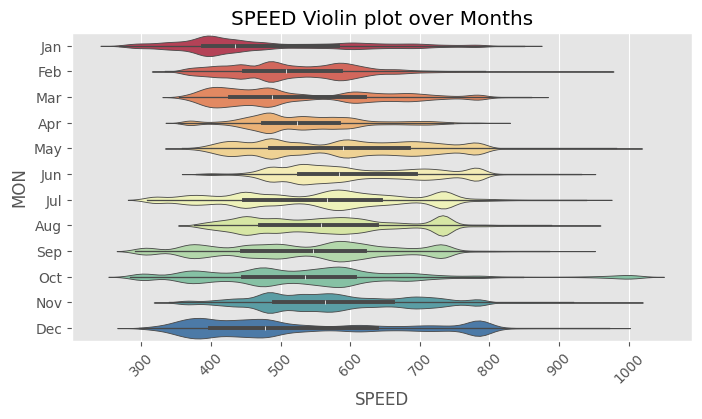

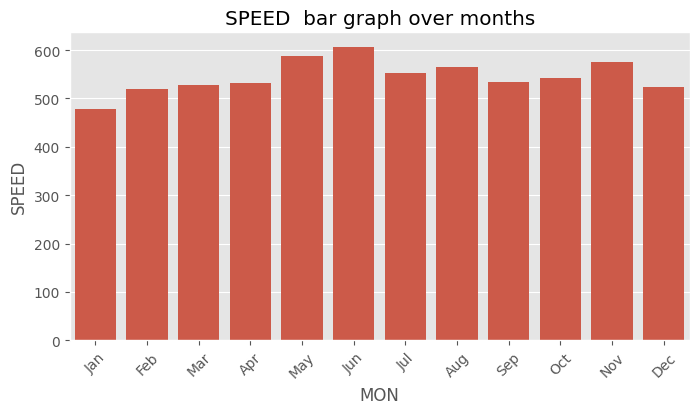

Plots


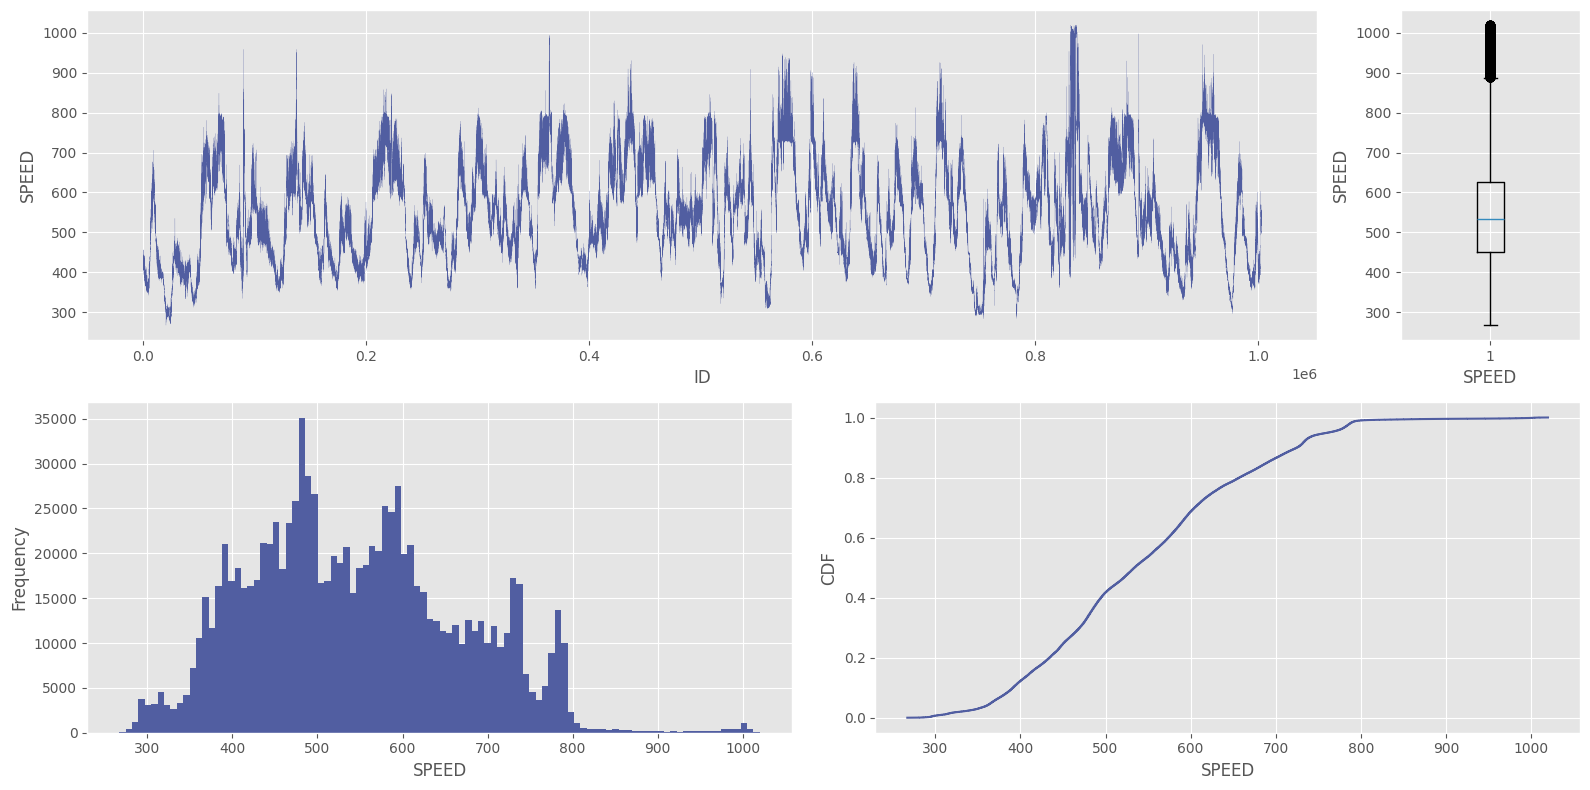

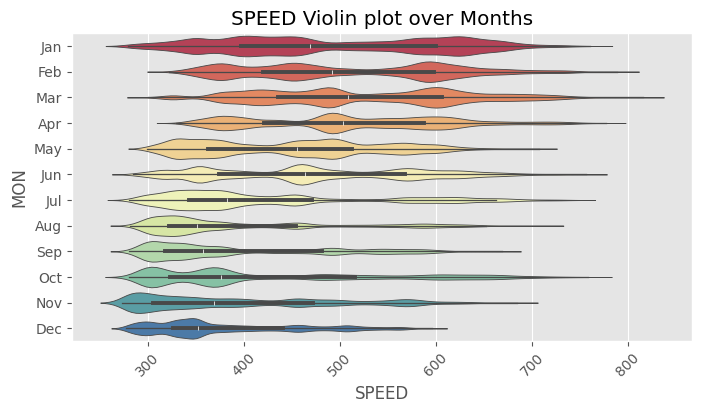

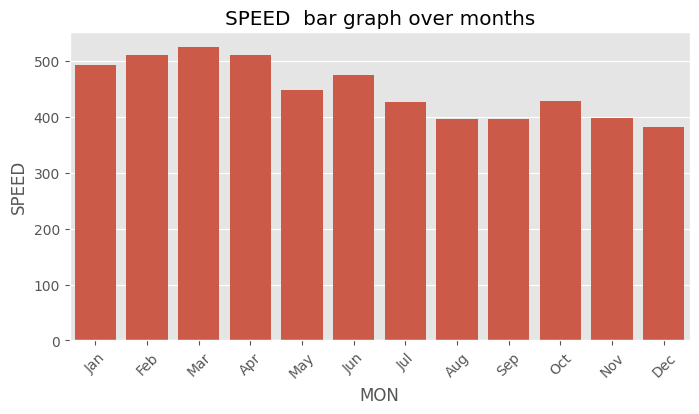

Plots


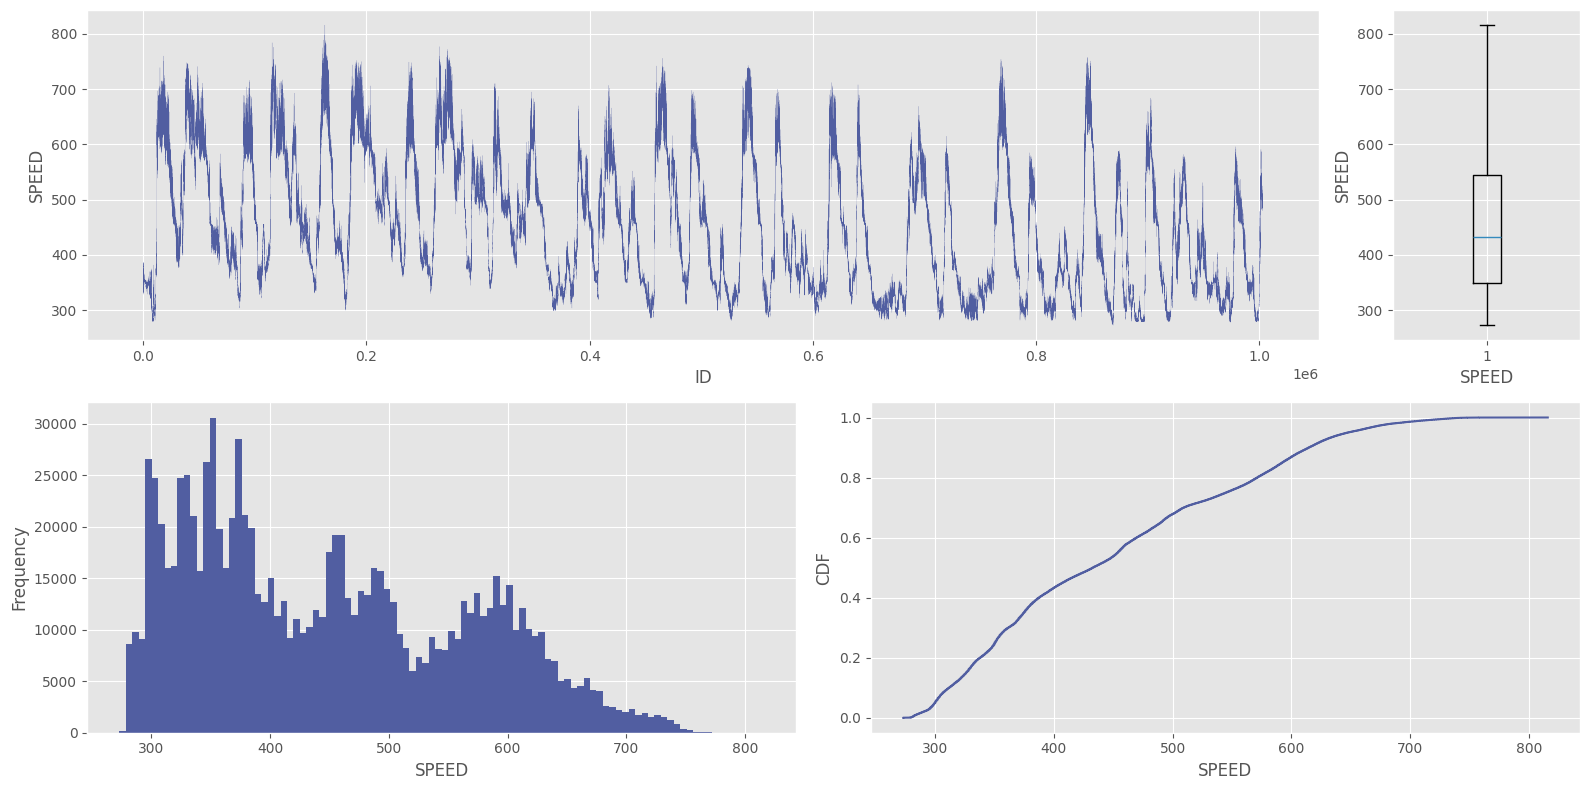

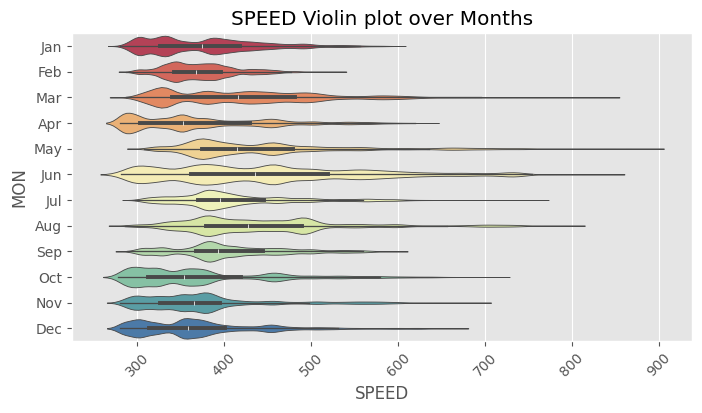

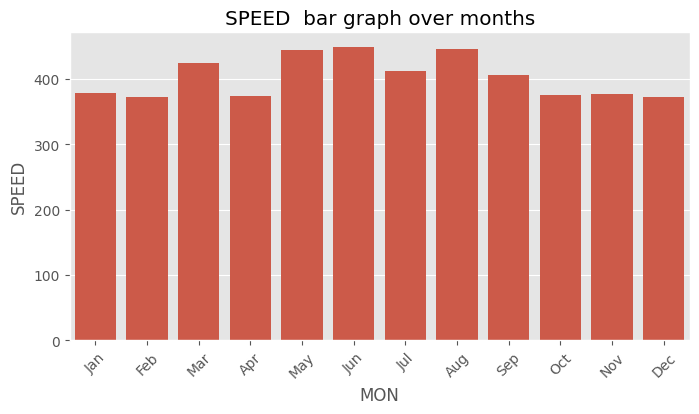

Plots


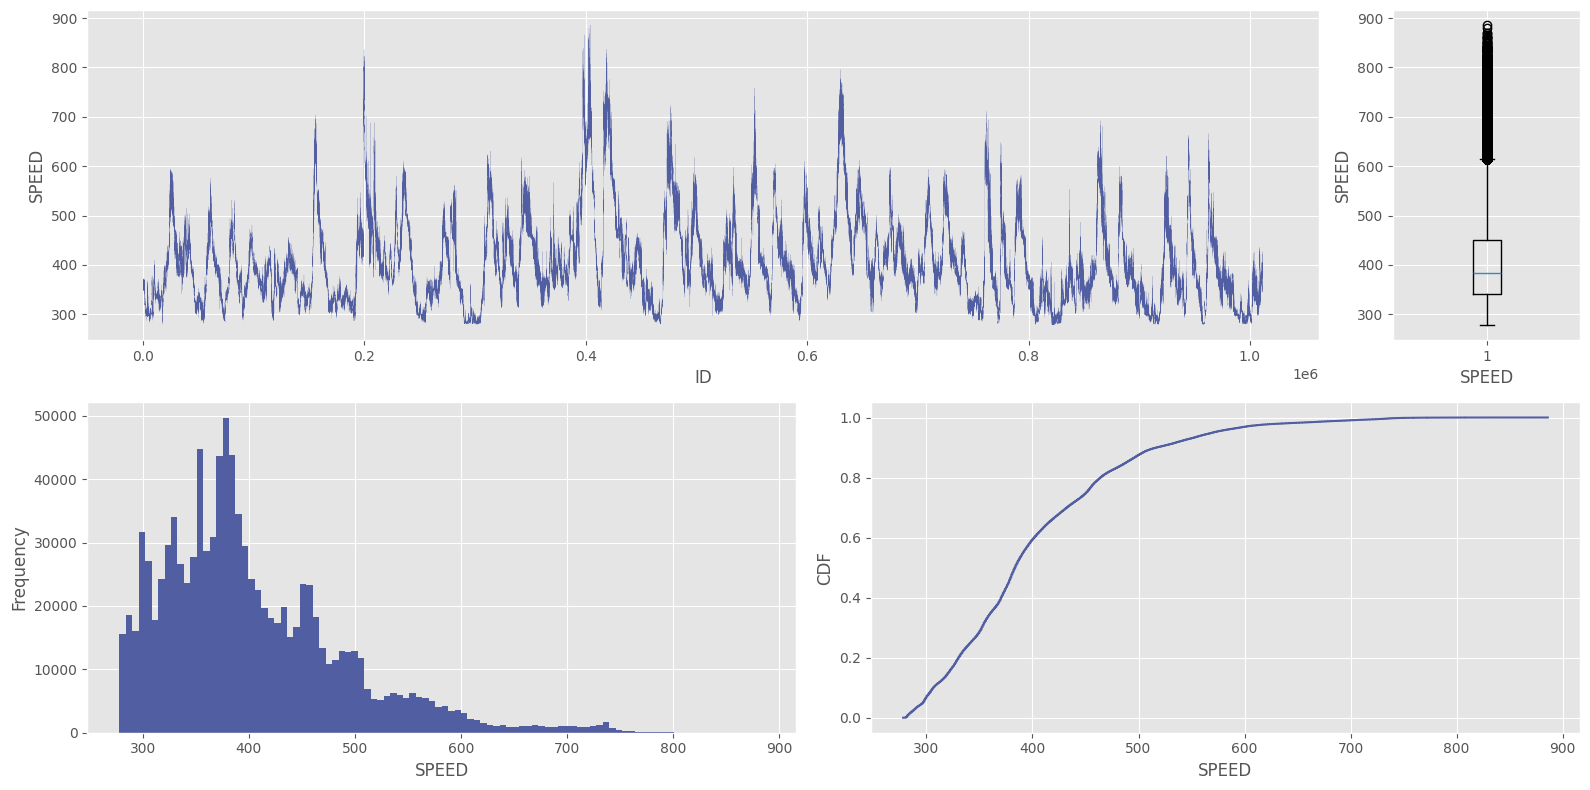

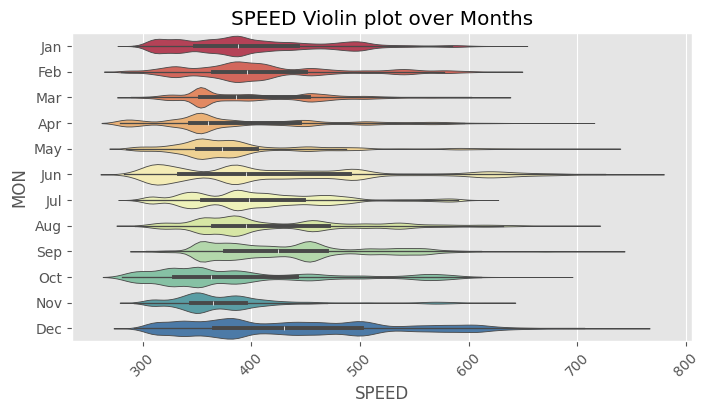

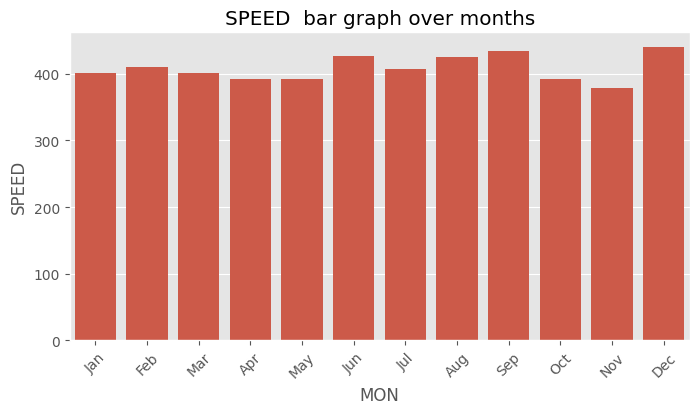

Plots


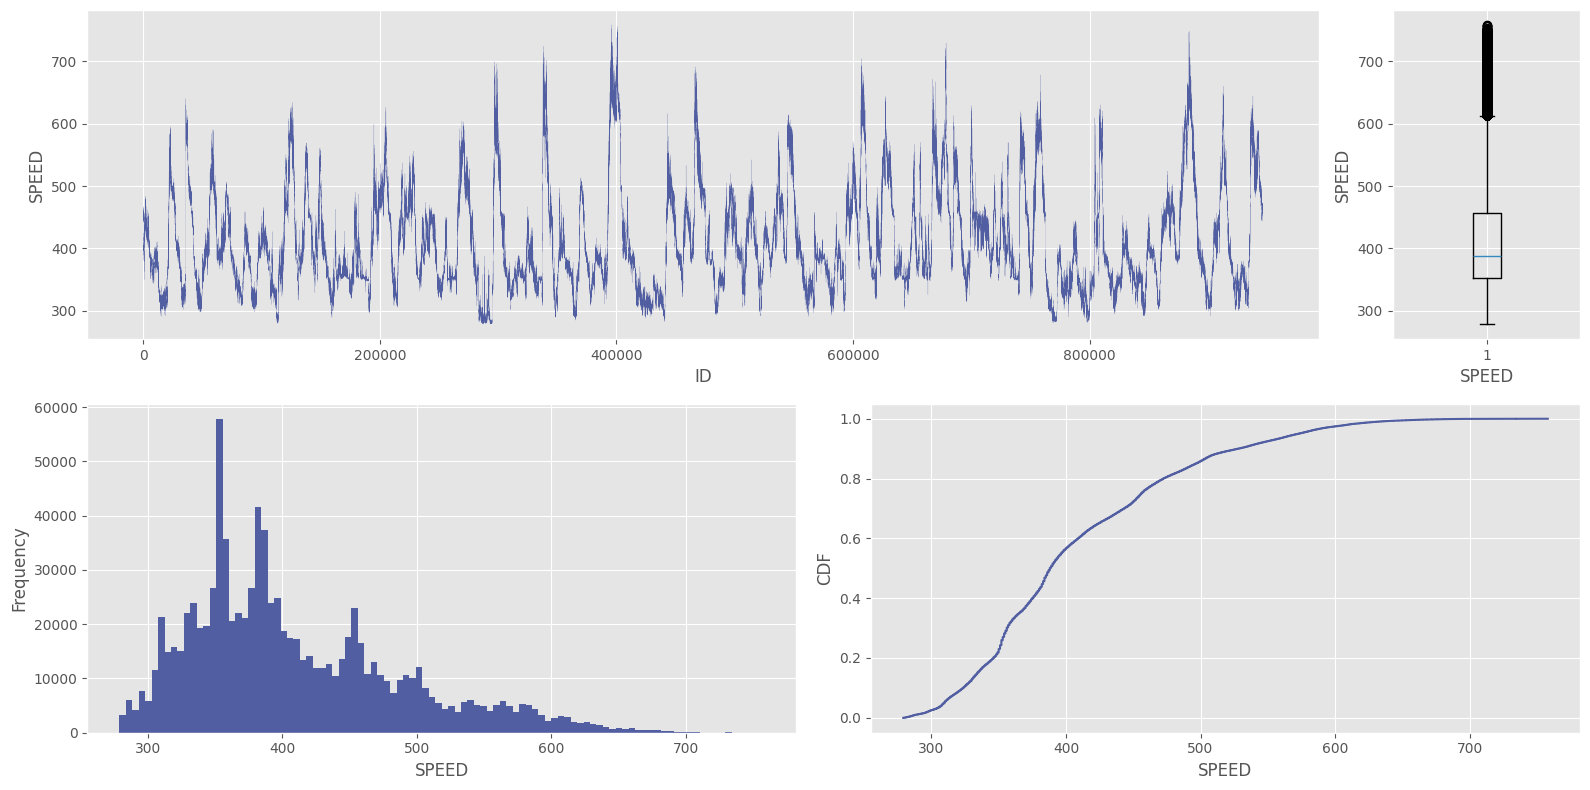

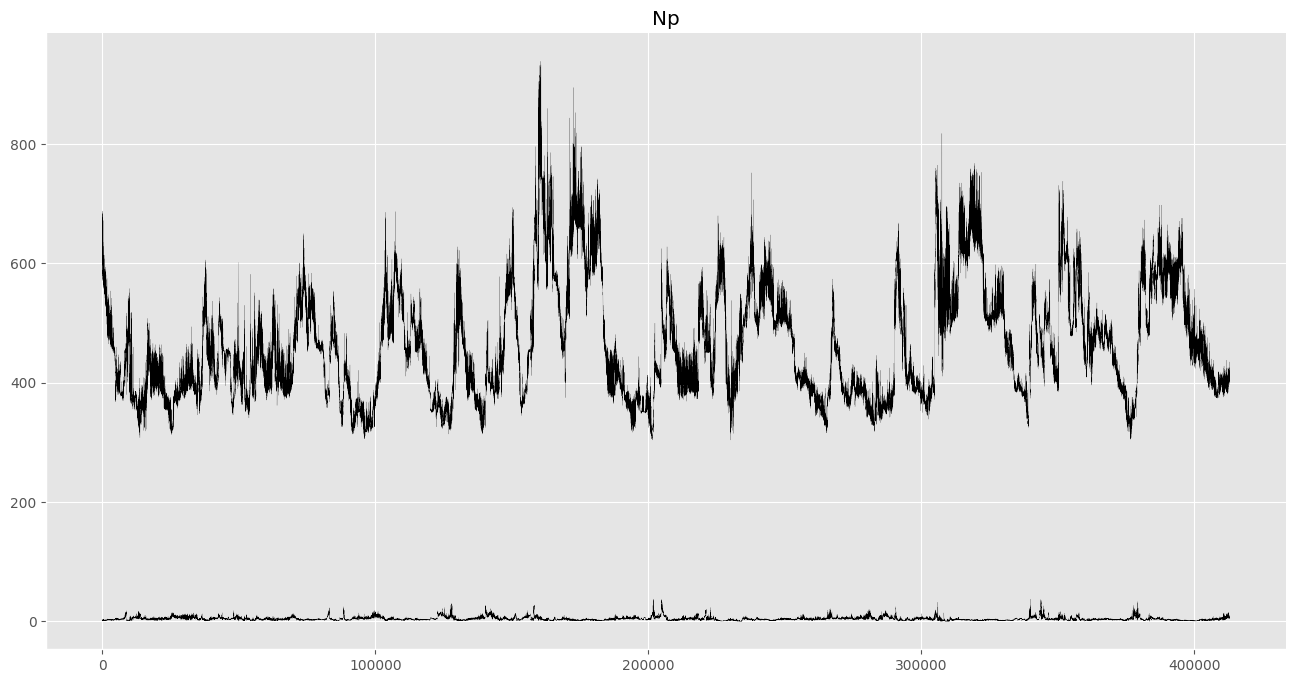

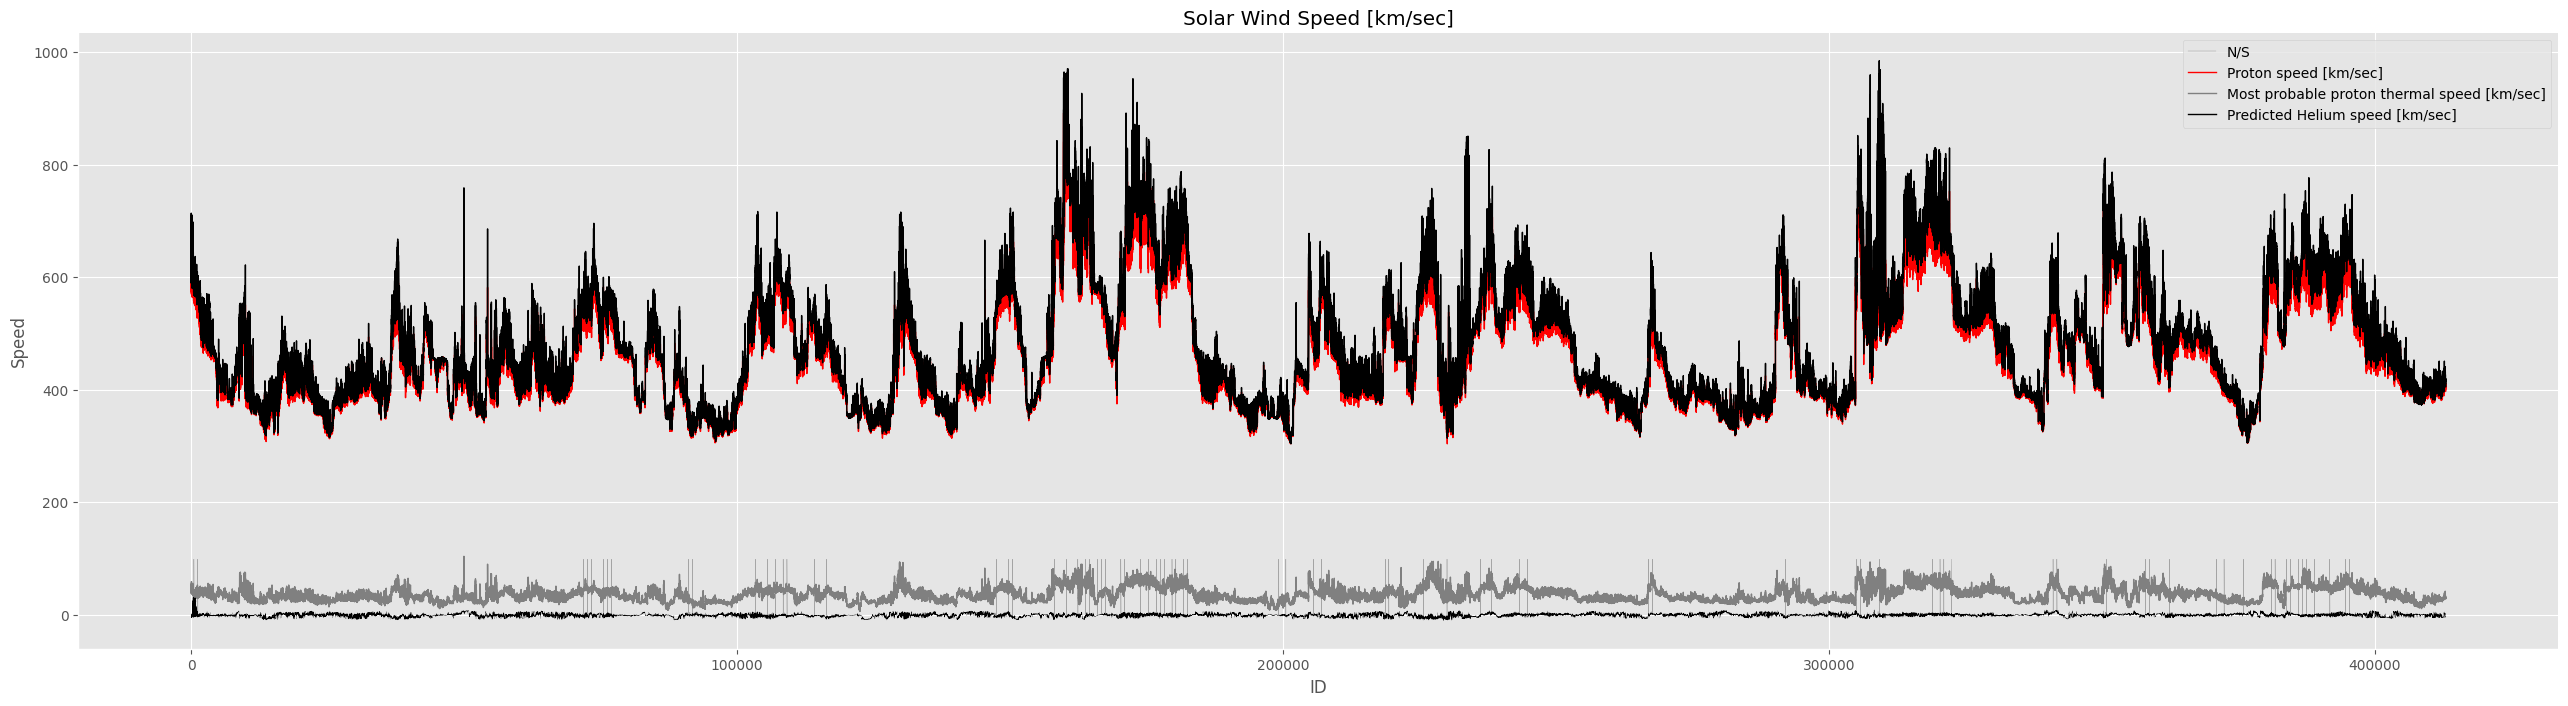

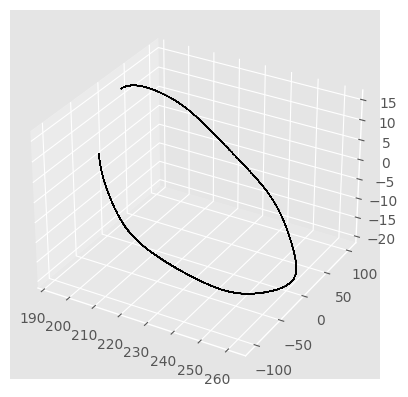

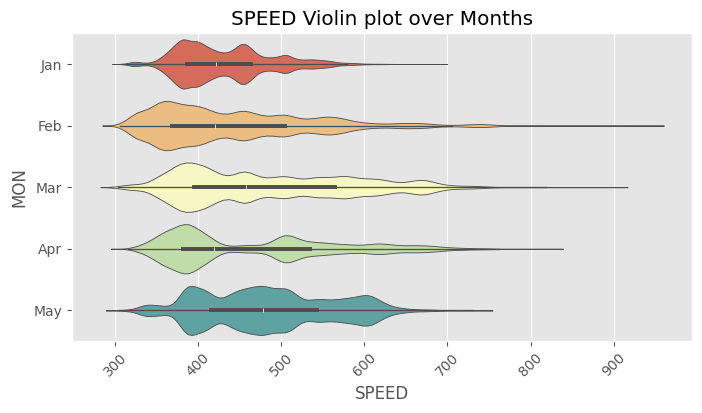

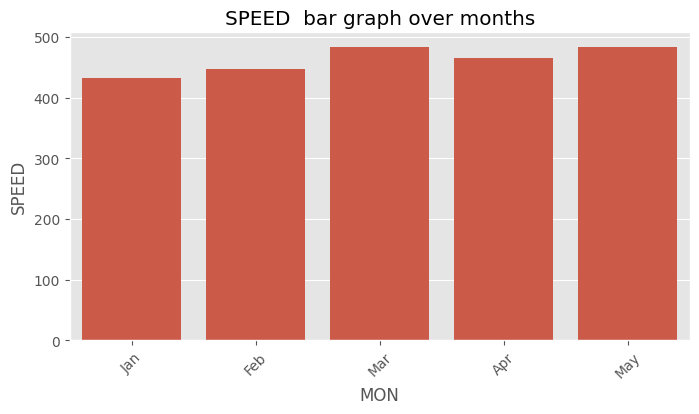

Plots


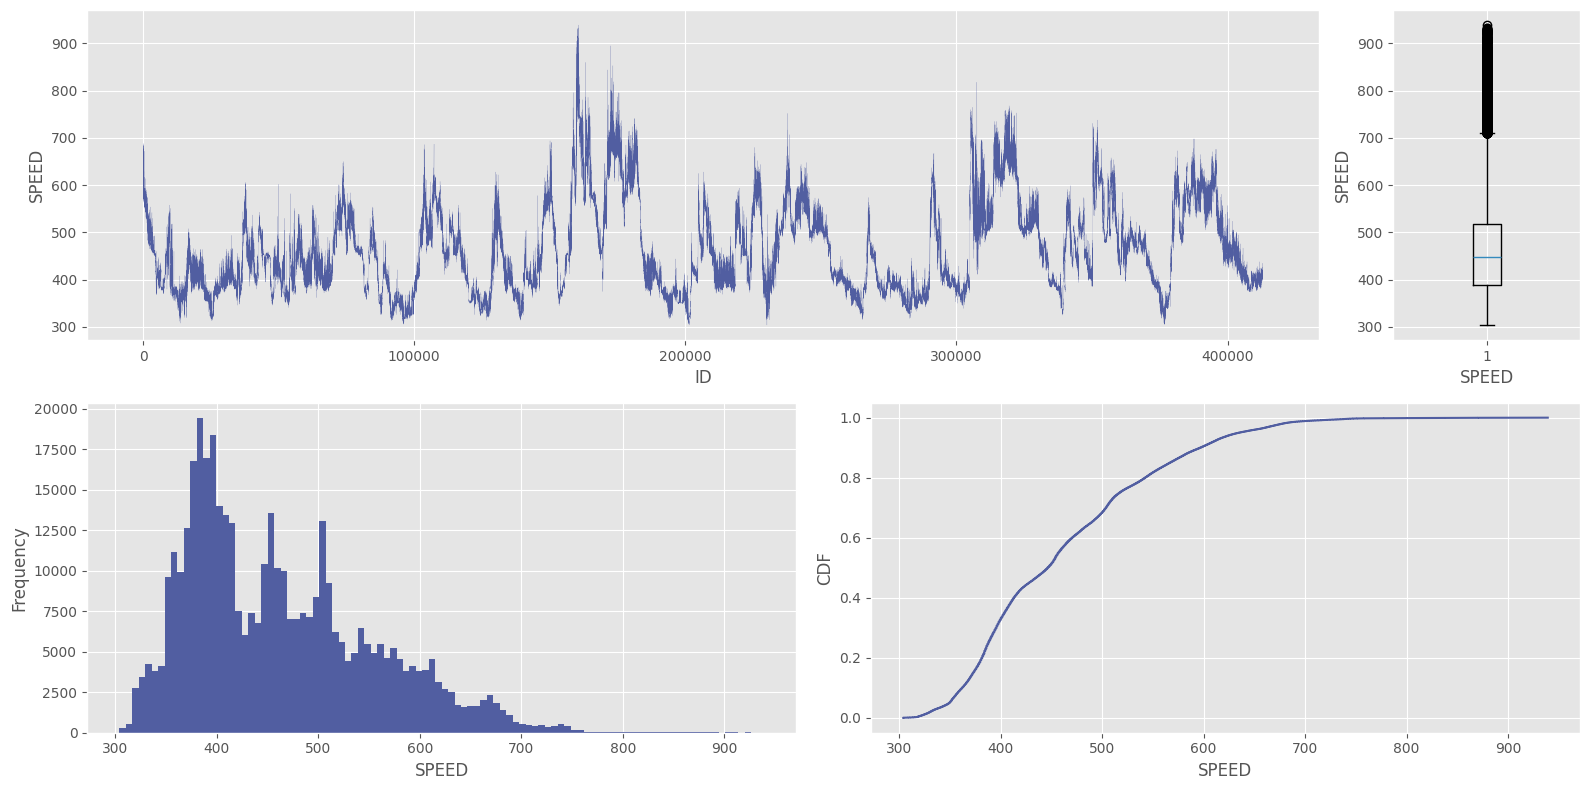

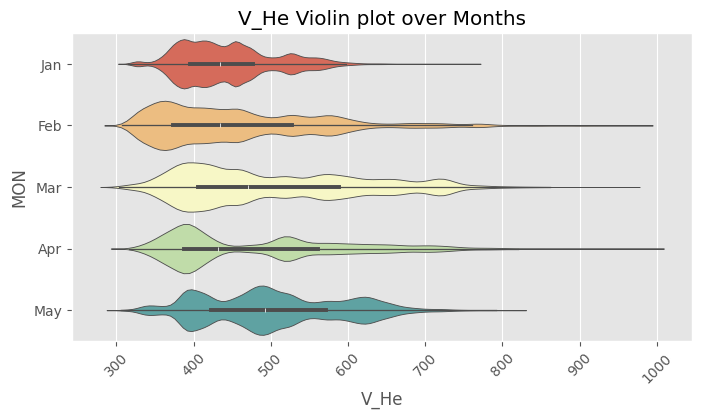

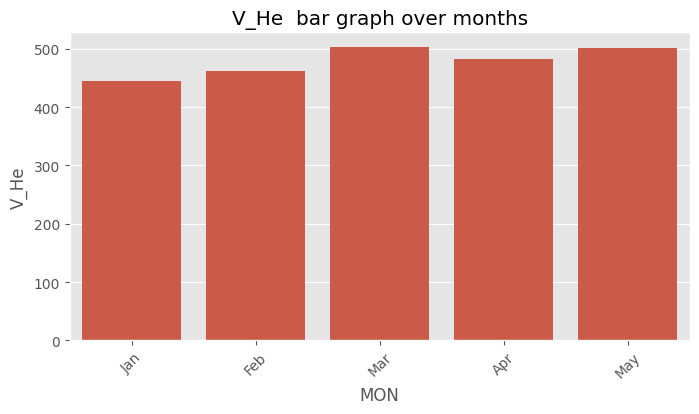

Plots


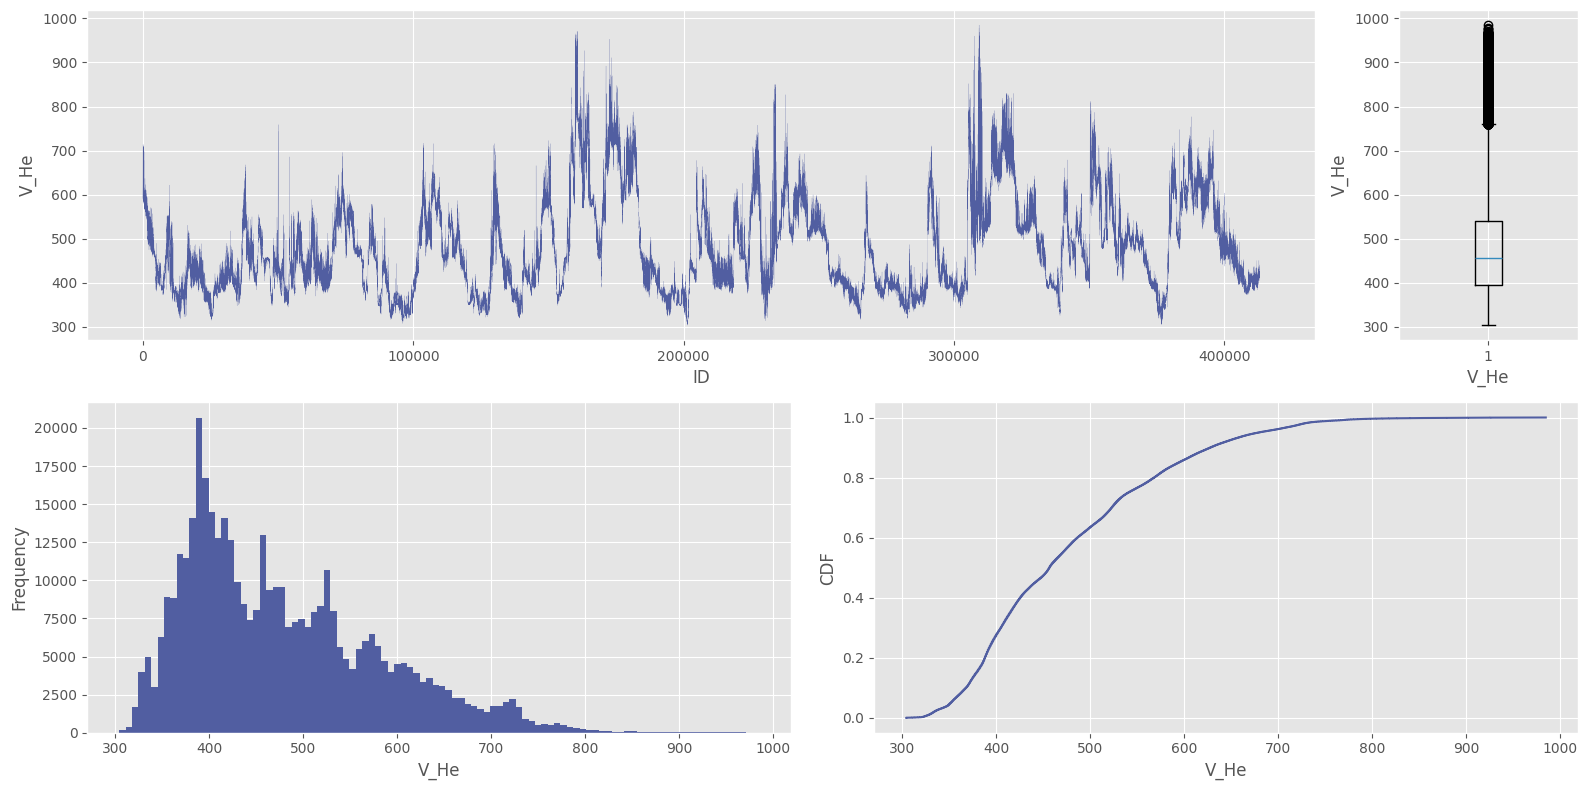

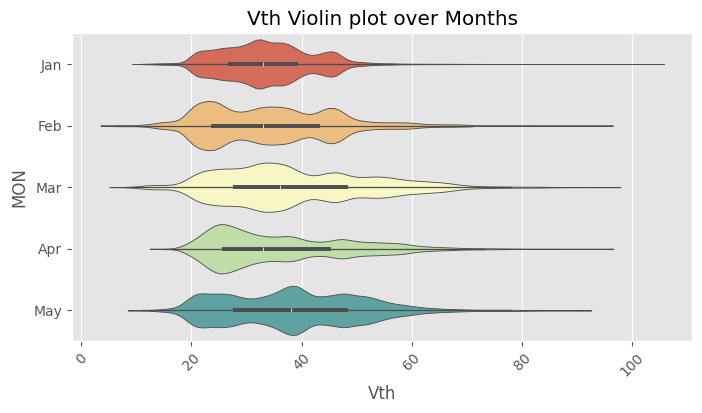

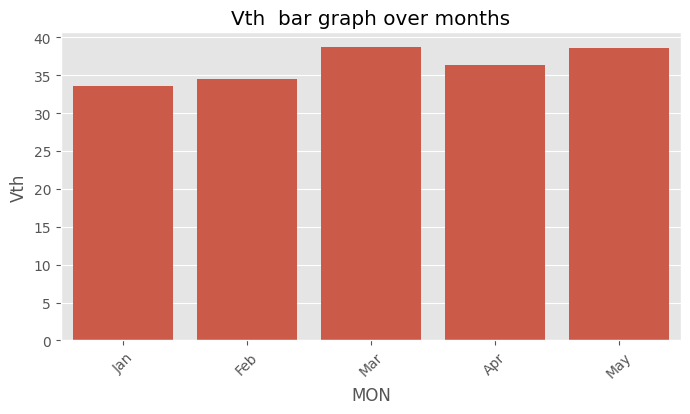

Plots


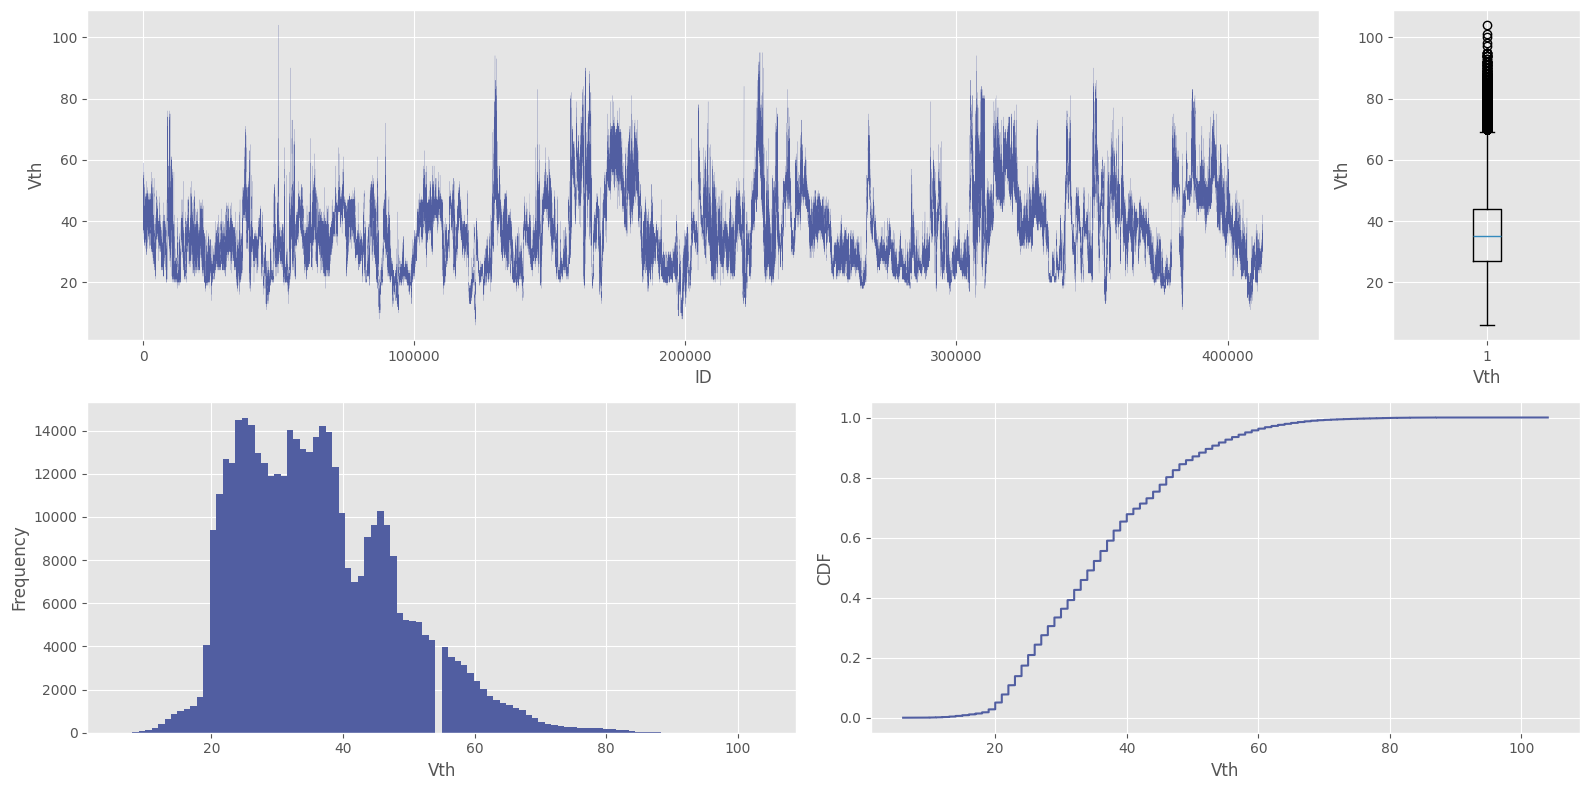

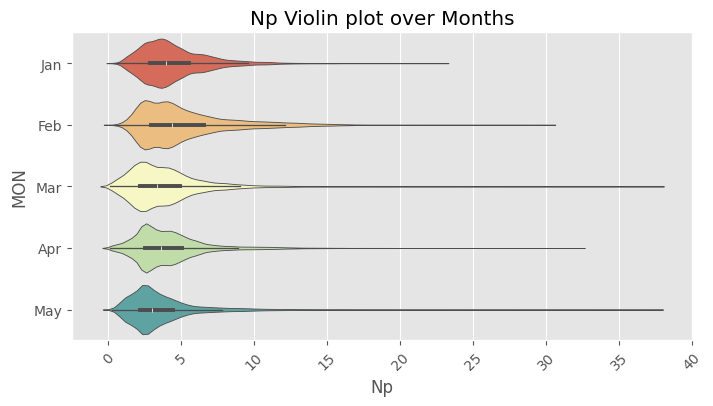

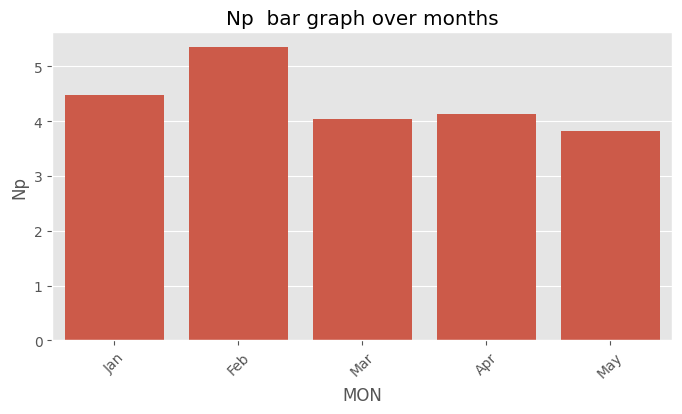

Plots


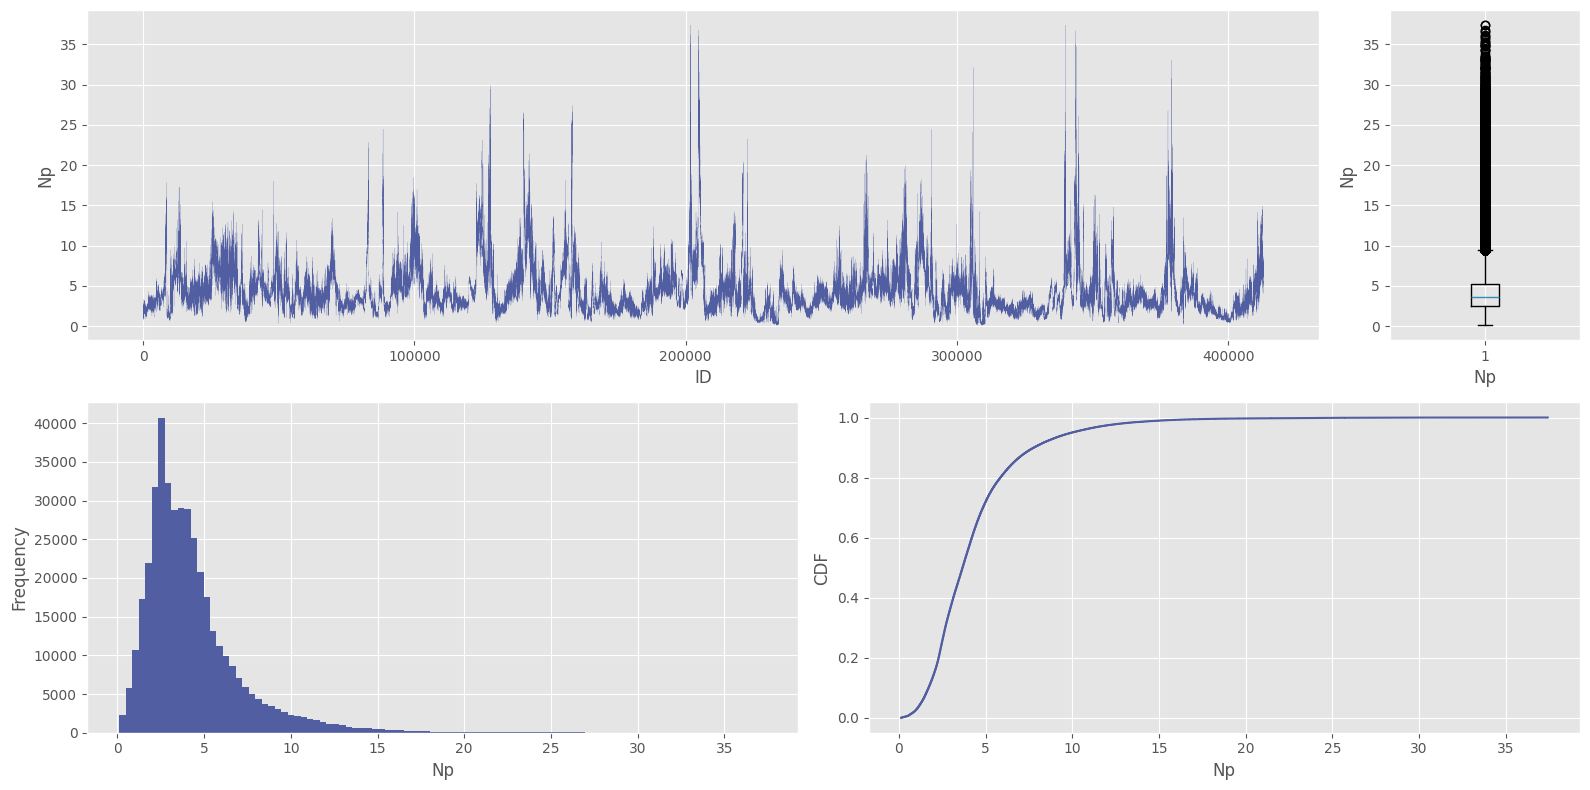

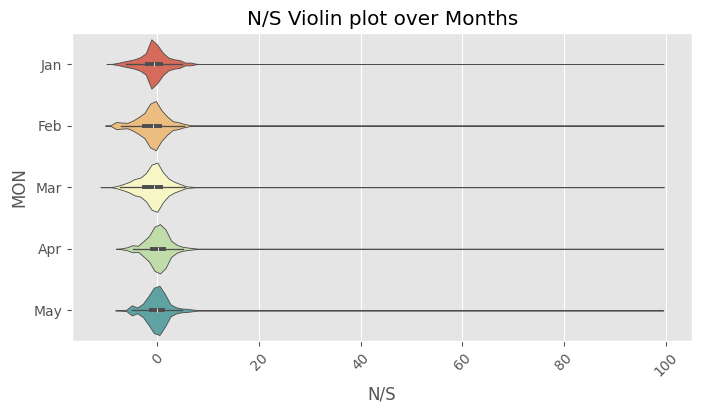

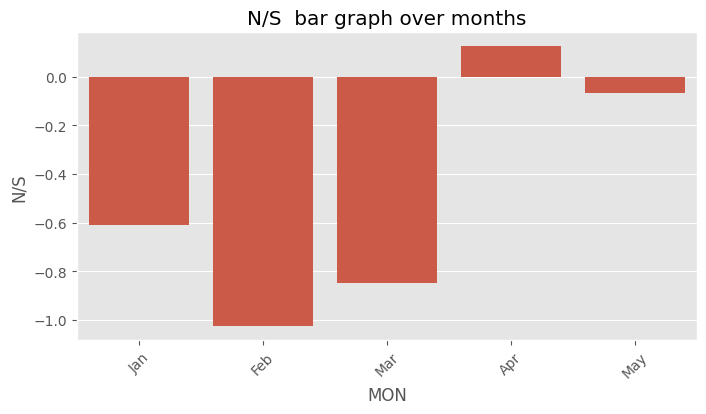

Plots


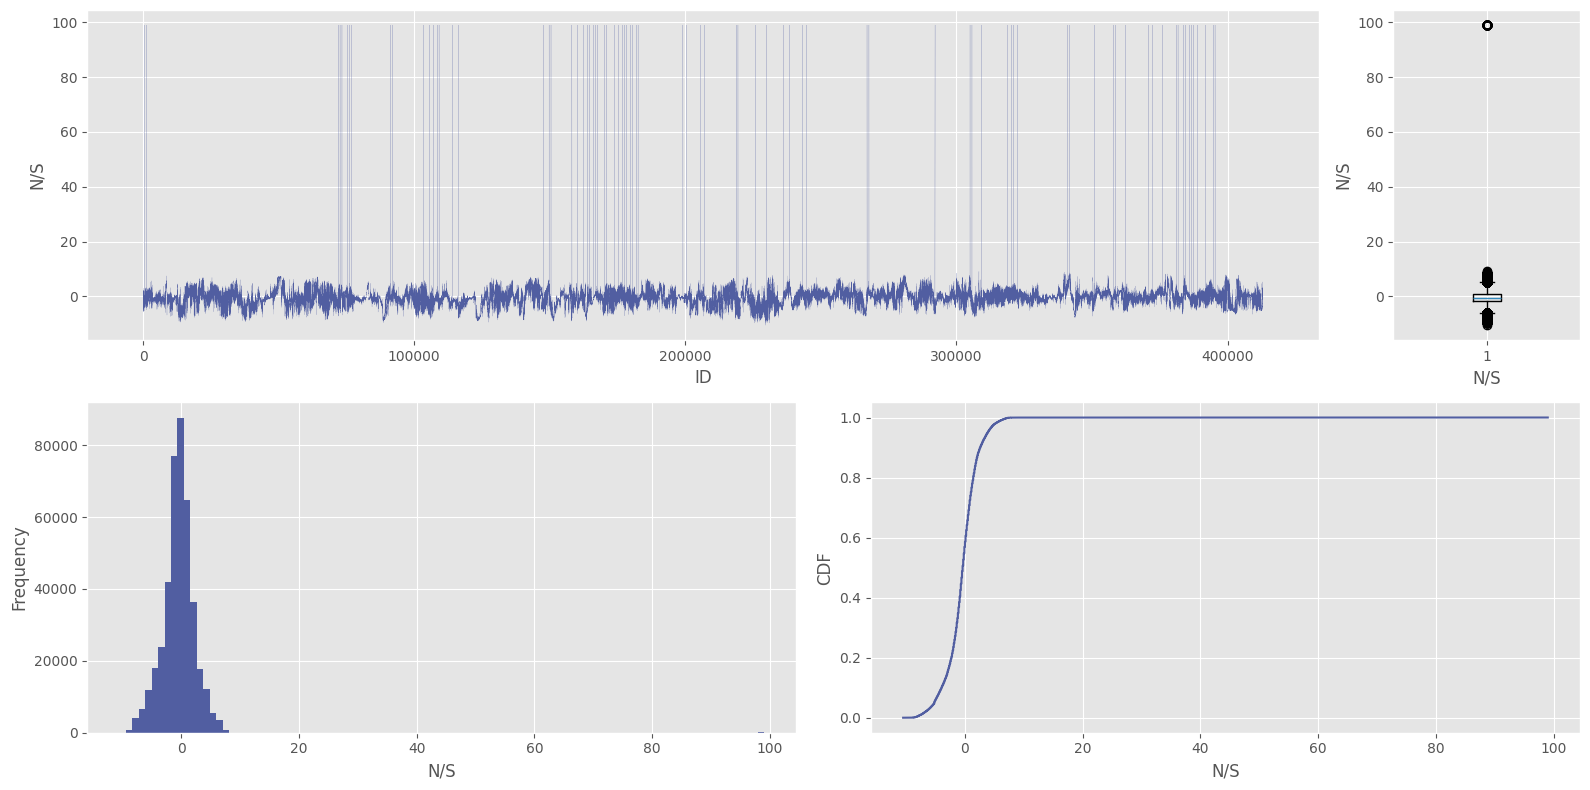

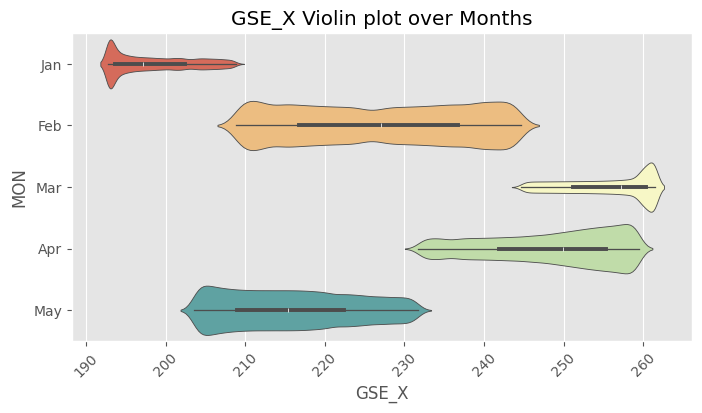

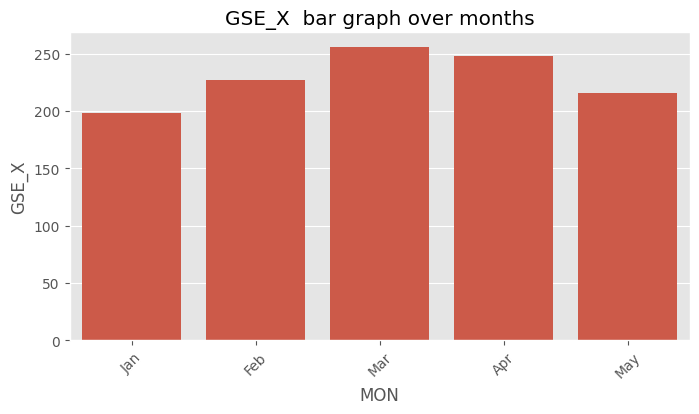

Plots


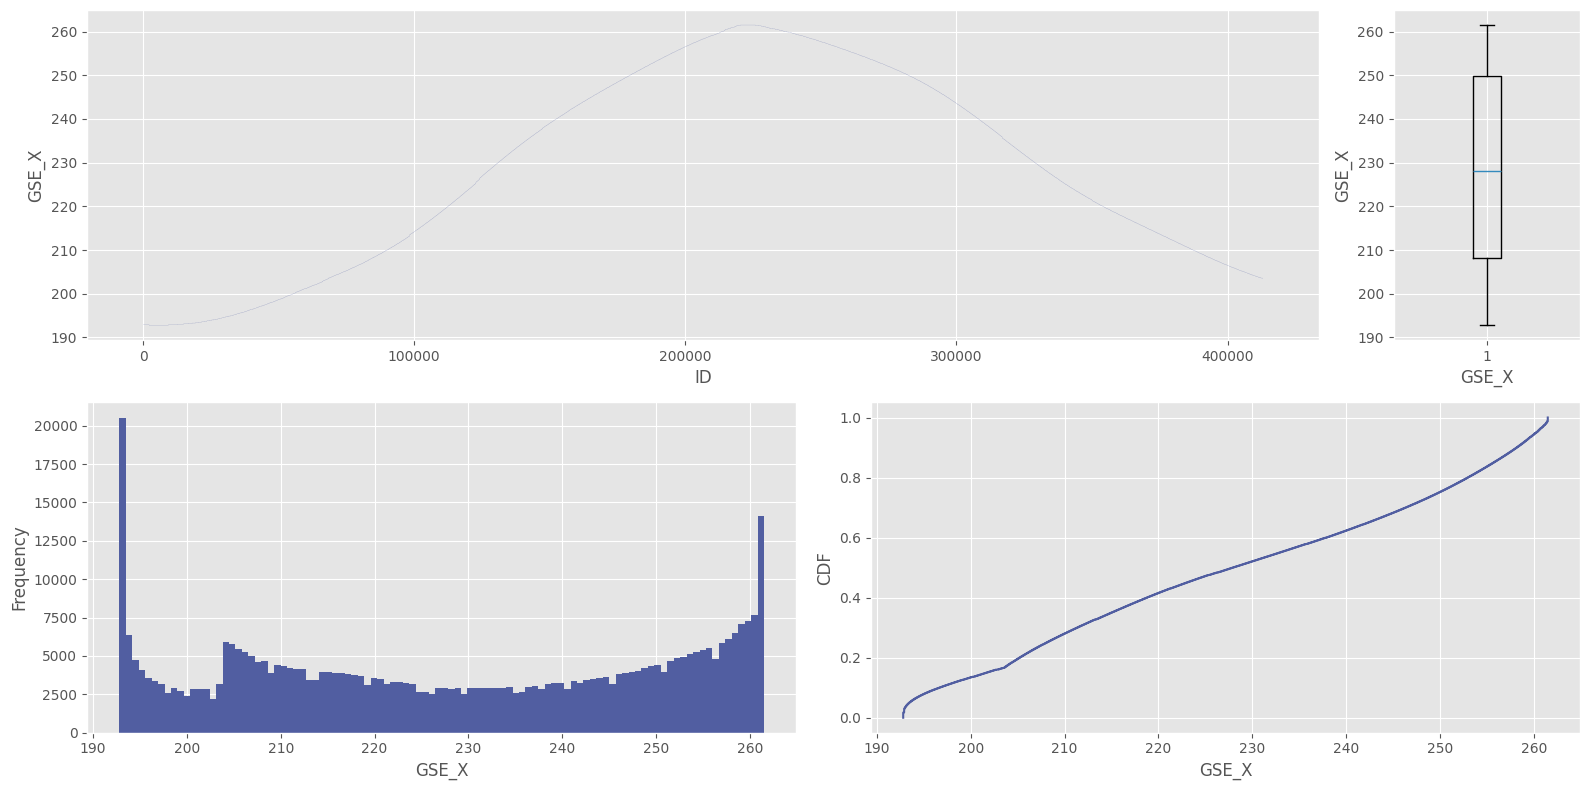

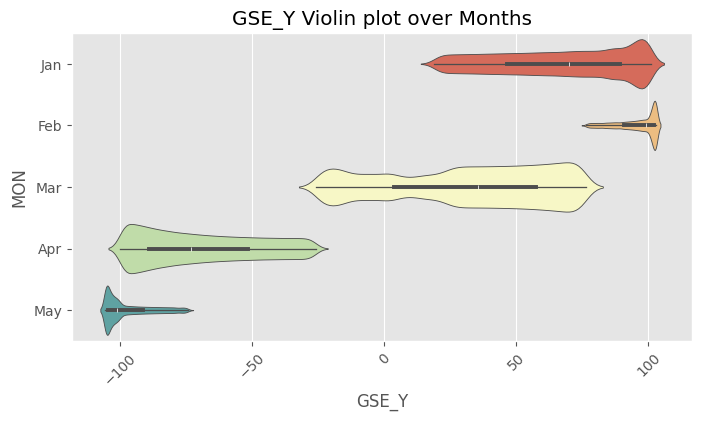

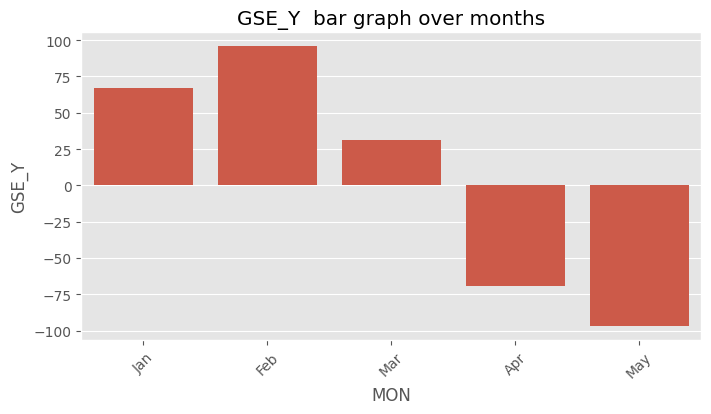

Plots


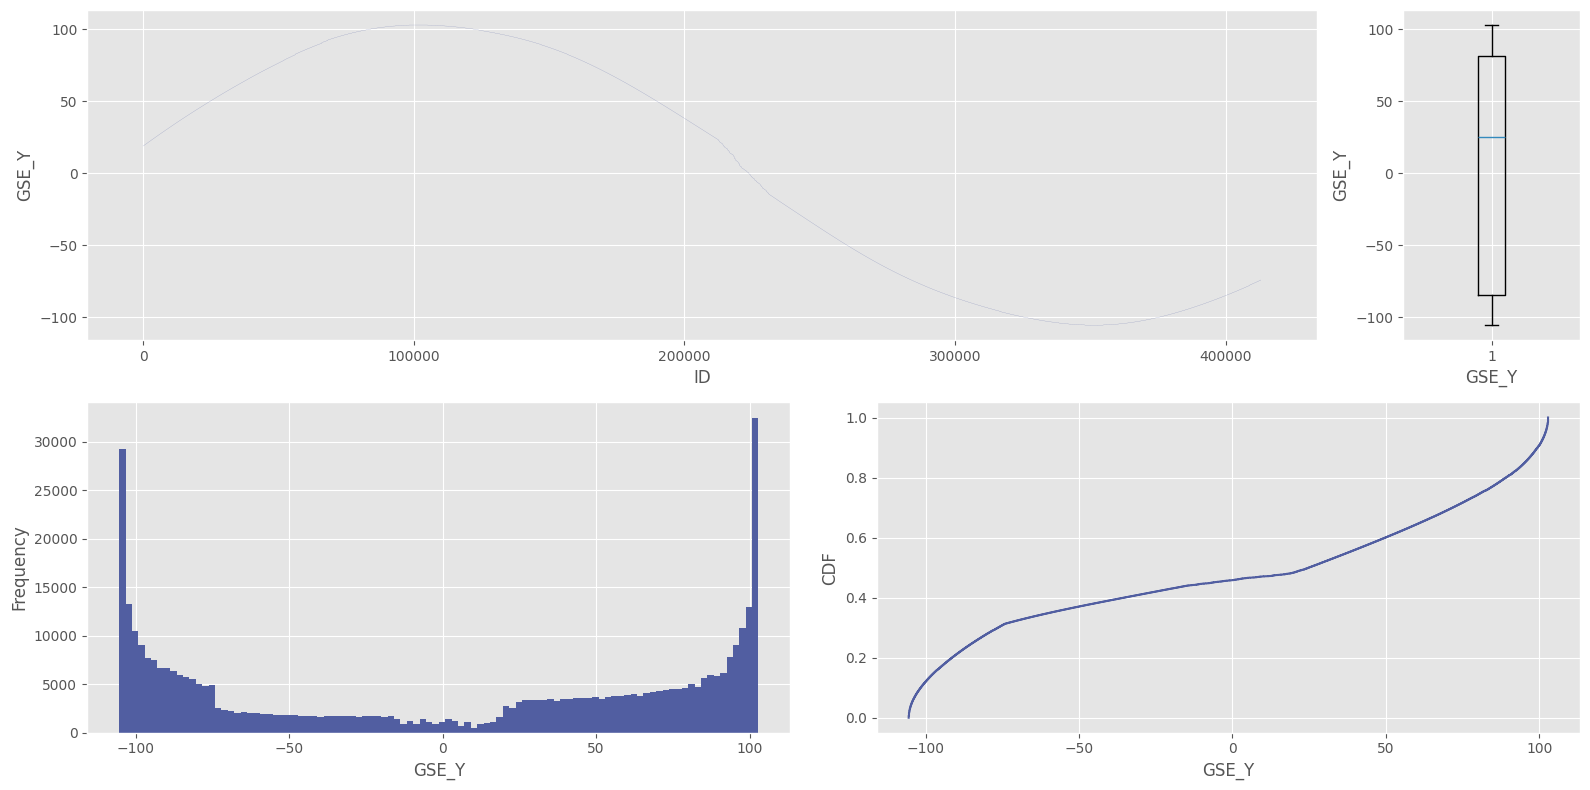

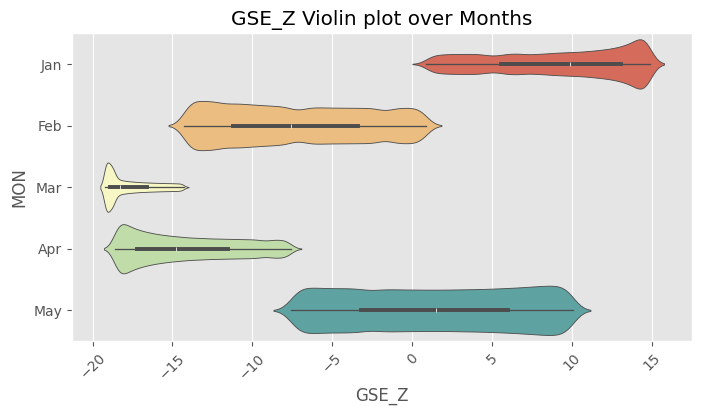

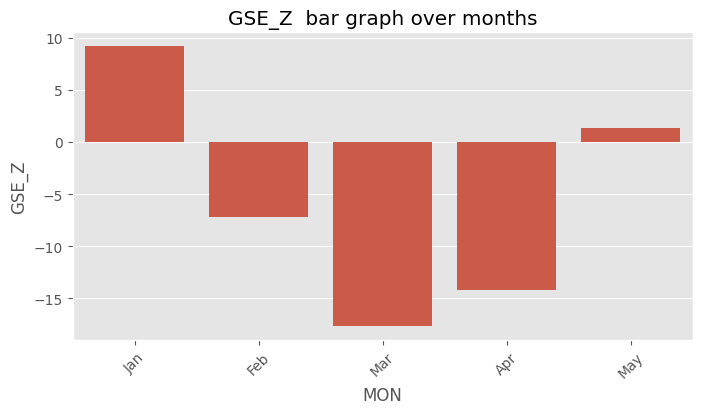

Plots


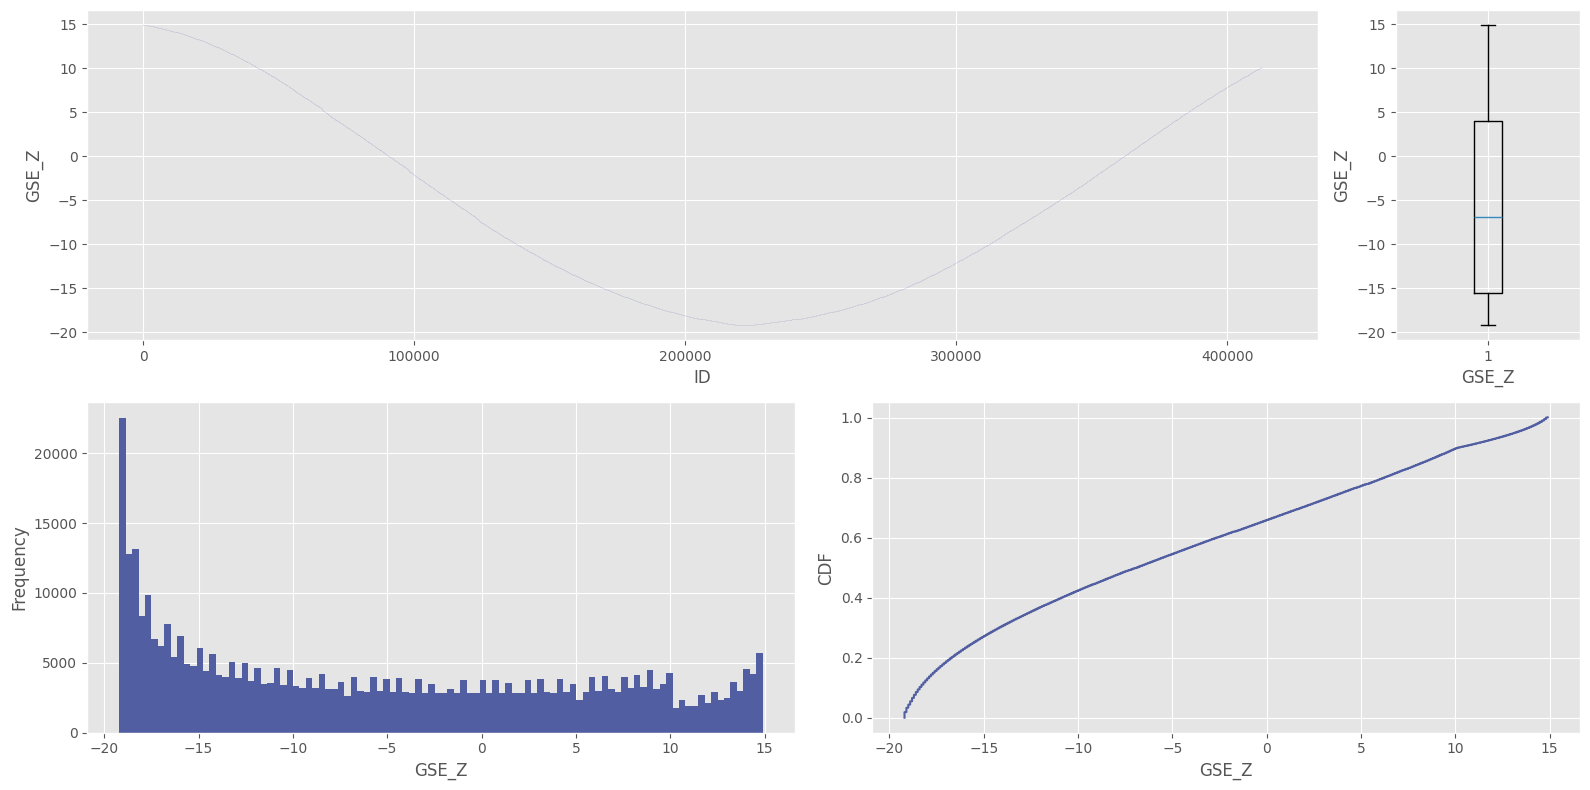

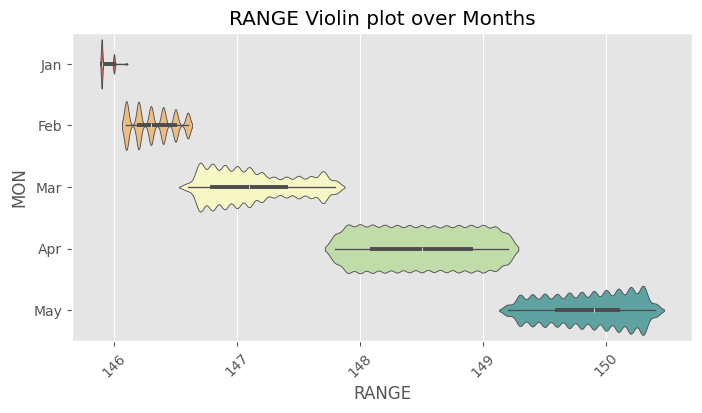

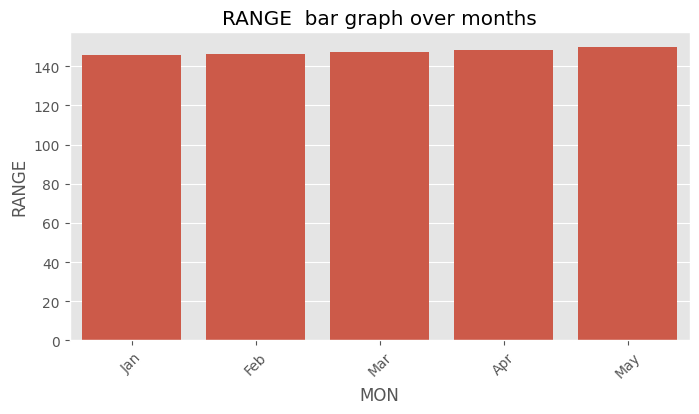

Plots


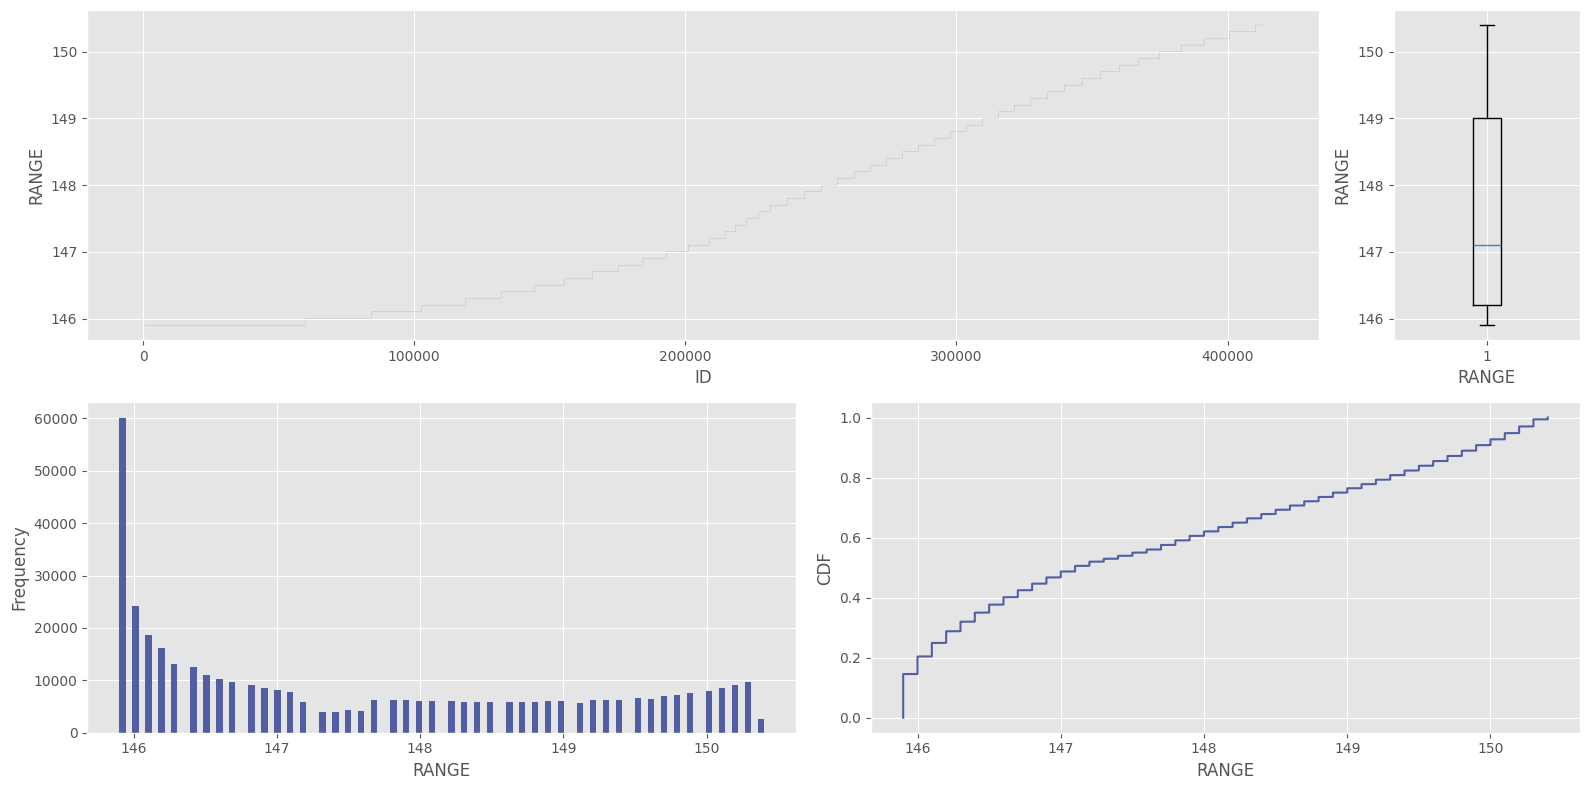

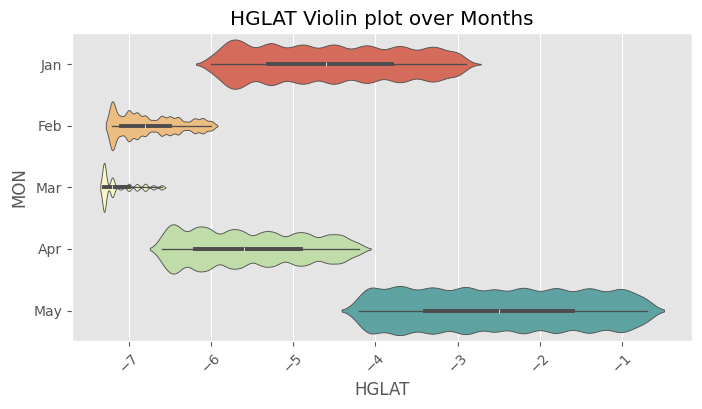

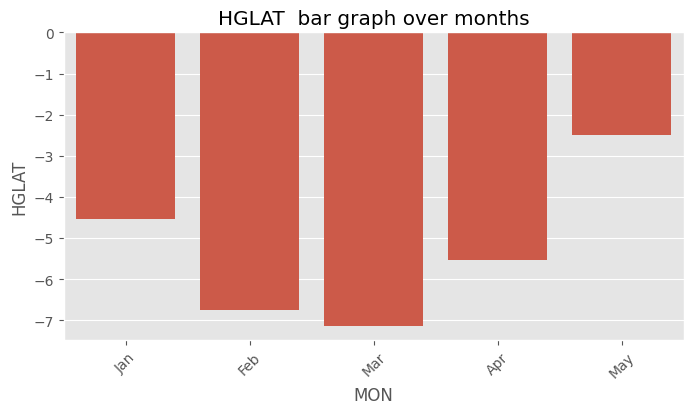

Plots


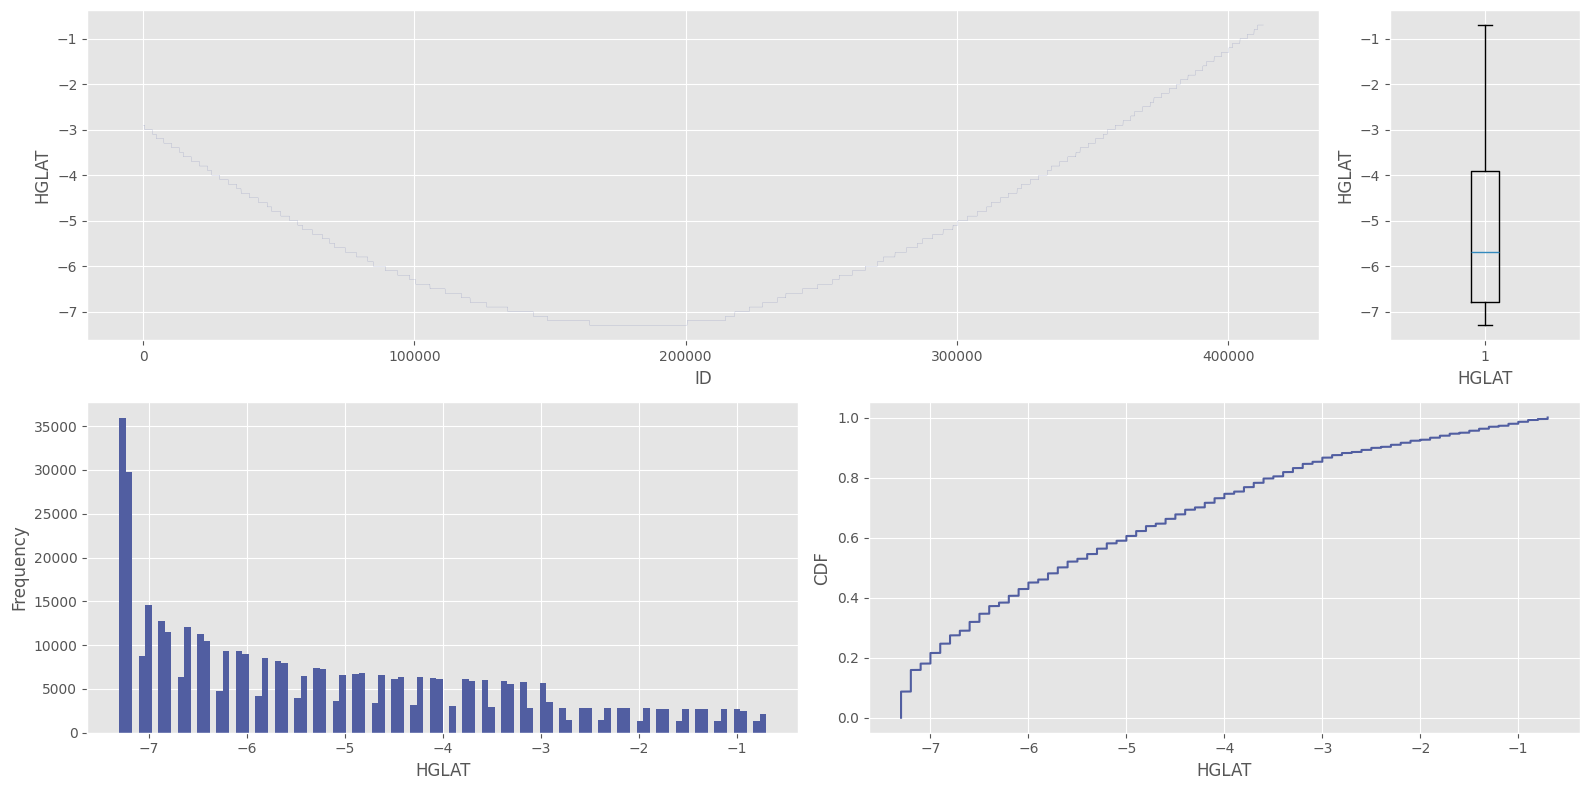

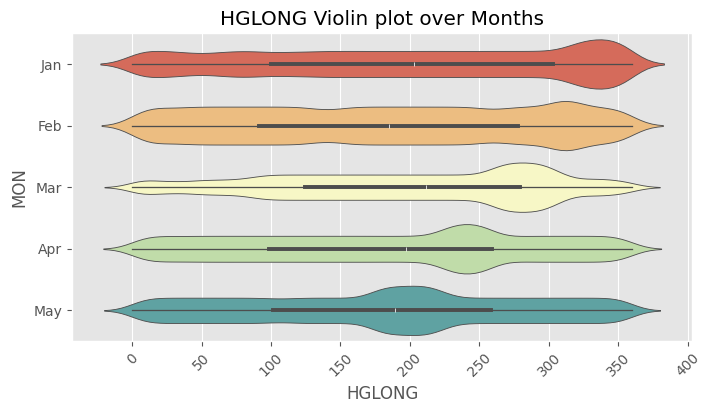

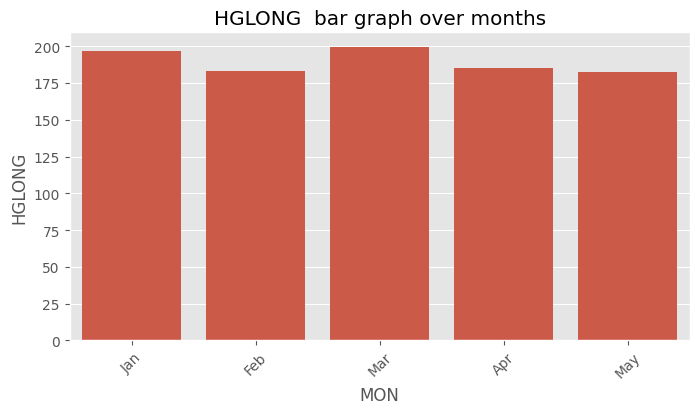

Plots


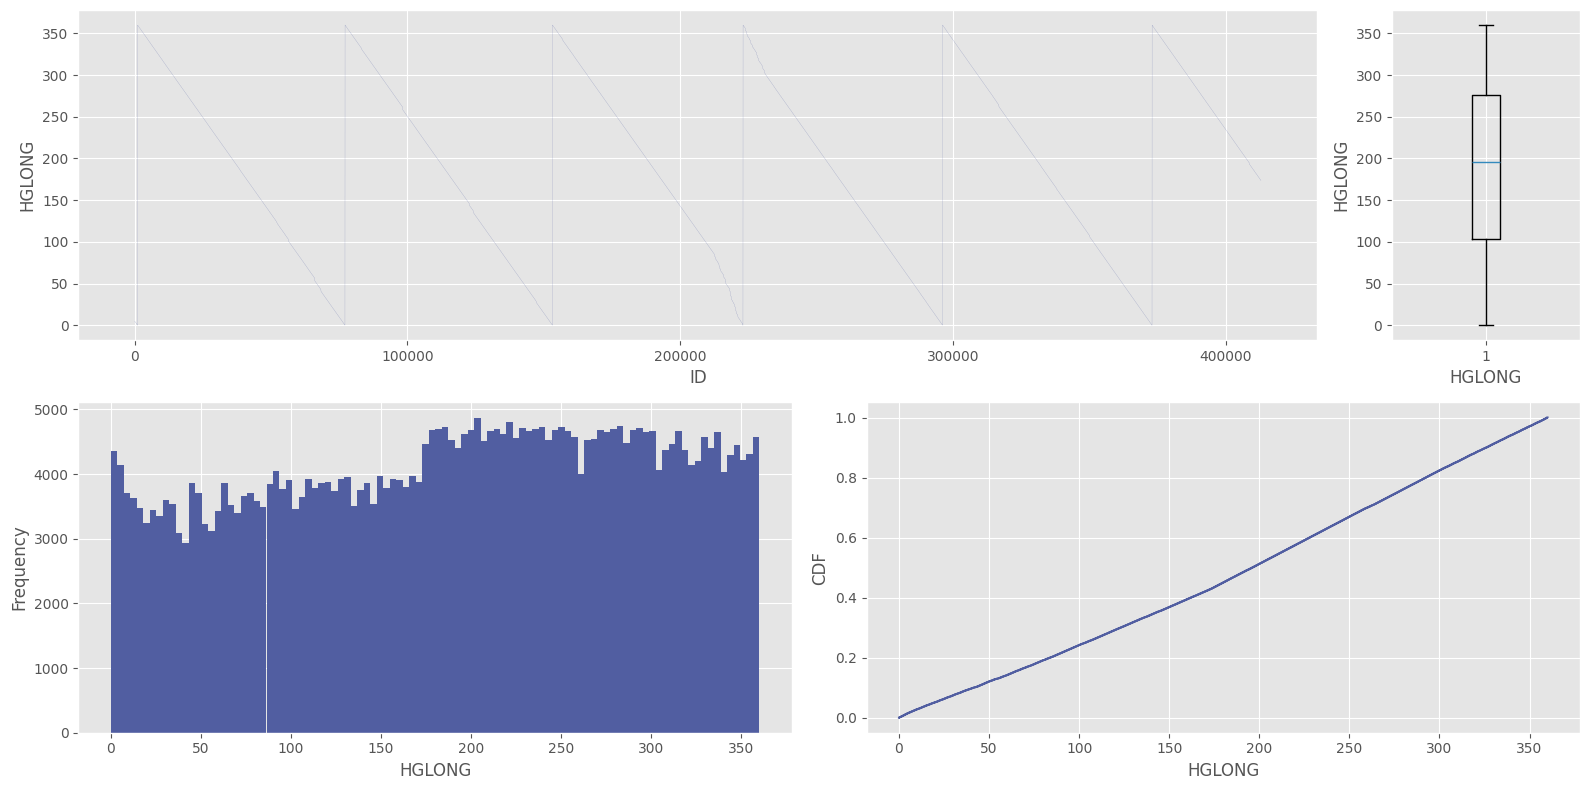

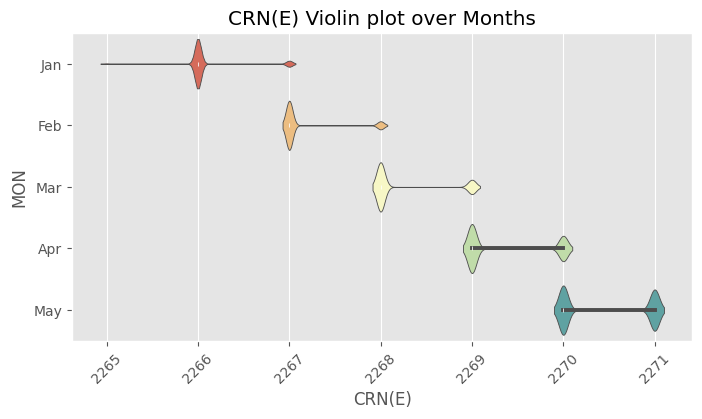

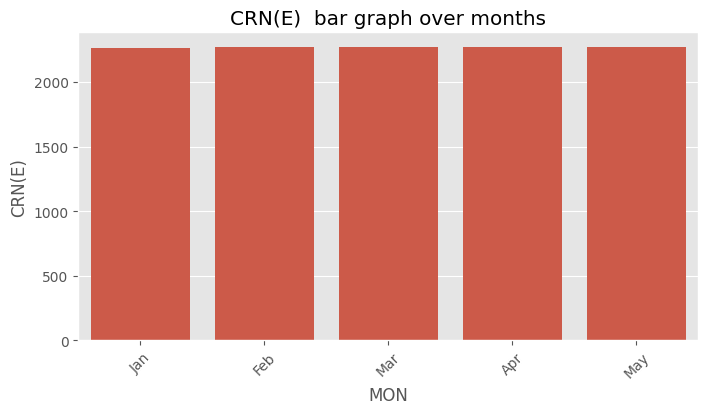

Plots


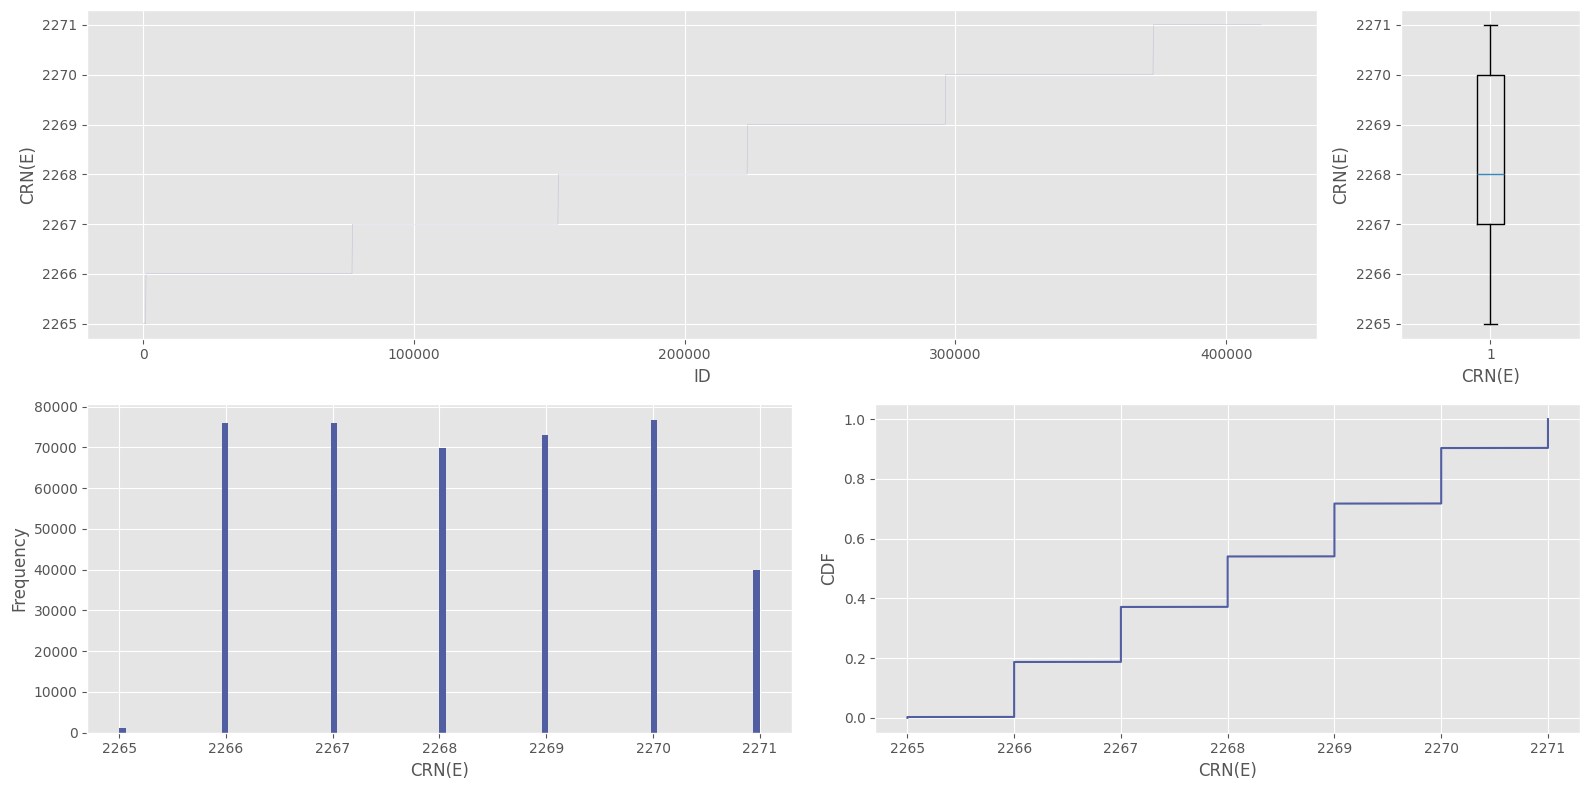

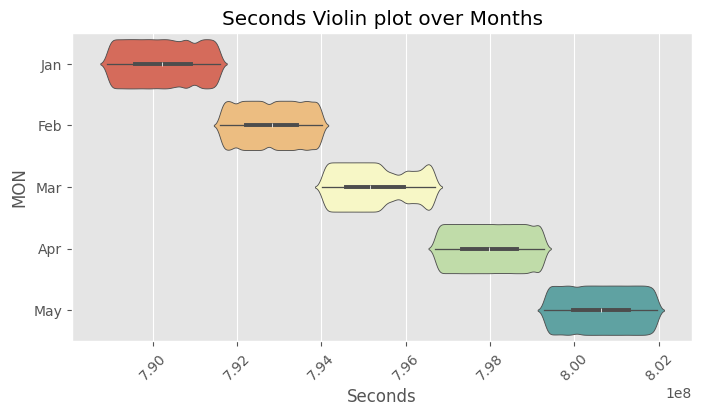

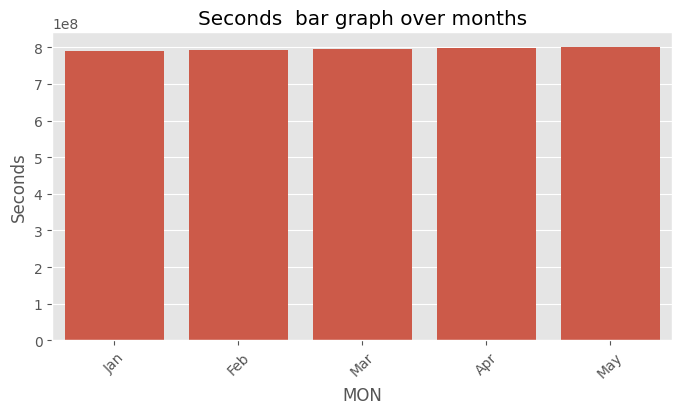

Plots


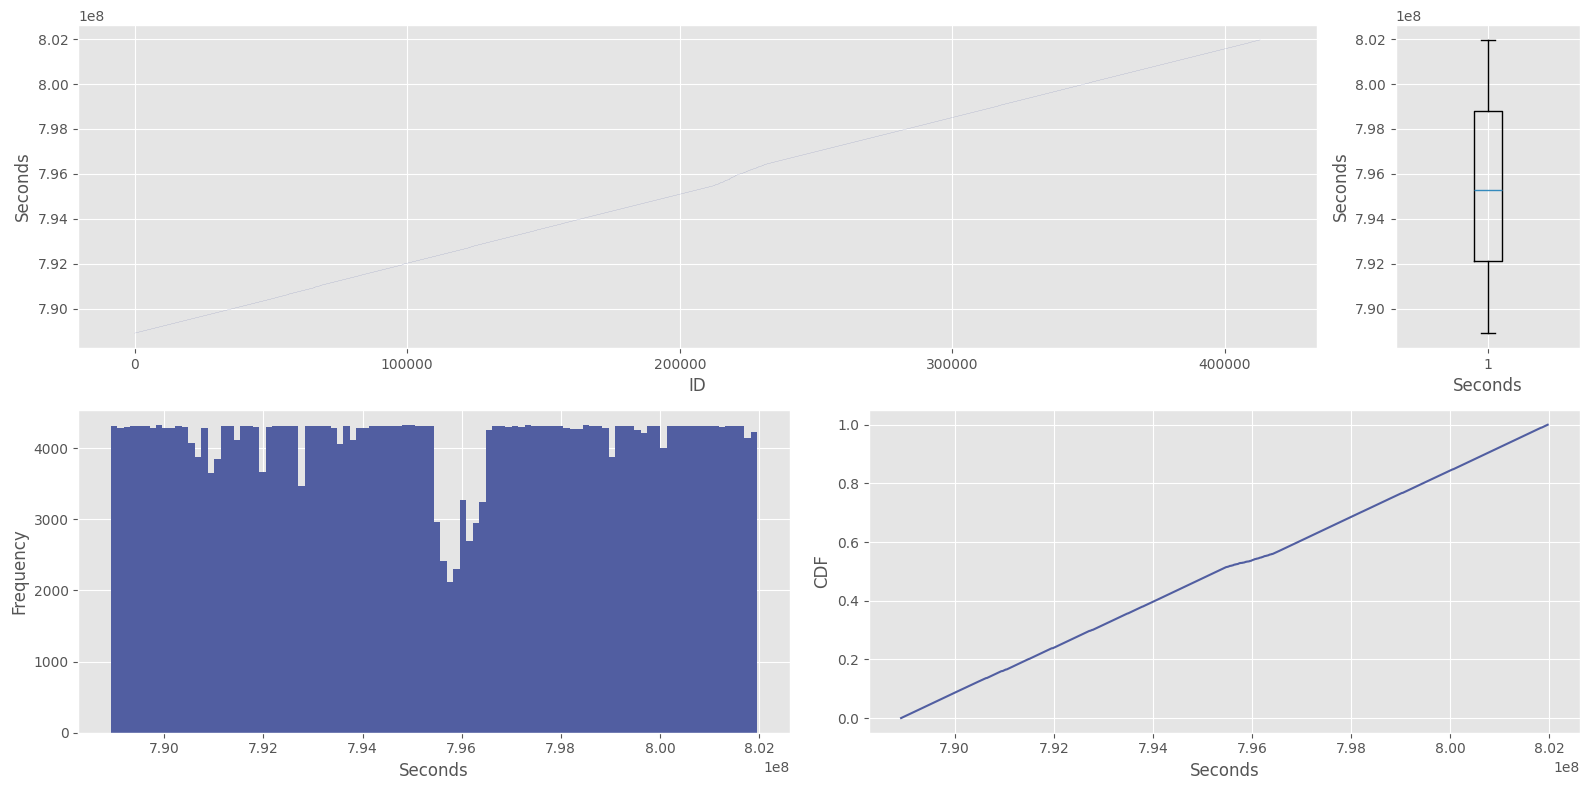

In [12]:
## **Data Analysis**
#### Time
def sec(yy, doy_hh_mm_ss, initial): #Function for obtain total seconds
    # Convert string to datetime format
    datofeo = ["0", "3", "8"]
    if str(yy) not in datofeo:
      date = datetime.strptime(str(yy) +":" + str(doy_hh_mm_ss), '%y:%j:%H:%M:%S')
    else:
      date = datetime.strptime("0" + str(yy) +":" + str(doy_hh_mm_ss), '%y:%j:%H:%M:%S')

    # Calculate the difference from the reference datetime
    timedelta = date - datetime(1900, 1, 1)

    # Total seconds
    seconds = timedelta.total_seconds() - 3092601600 # - 98 years and 24 days

    return seconds #Return float of the total seconds

def Seconds_data(data, initial):
  time_sec = data['DOY:HH:MM:SS'] # Rename time col for simplicity
  year = data["YY"]
  seconds_time = [sec(year[i], time_sec[i], initial) for i in range(0, len(time_sec), 1)] # Obtain each total seconds in all dataframe
  data.insert(4,"Seconds",seconds_time) # Insert total seconds to dataframe
Secondszeroraw = 0
Secondszerocalibrated = 0
for year in years:
  Seconds_data(Raw_data[year], Secondszeroraw)
  Seconds_data(Calibrated_data[year], Secondszerocalibrated)
  Secondszeroraw += Raw_data[year]["Seconds"][len(Raw_data[year])-1]
  Secondszerocalibrated += Calibrated_data[year]["Seconds"][len(Calibrated_data[year])-1]


# Concat all data (WARNING: High spend of RAM memory)

Raw = []
Raw = pd.concat(Raw_data, axis = 0)
Raw

# Concat all data (WARNING: High spend of RAM memory)

Calibrated = []
Calibrated = pd.concat(Calibrated_data, axis = 0)
Calibrated

### Data
data =  Raw_data[2023]
calibrated_data = Calibrated_data[2023]
data
calibrated_data
Calibrated.describe()
print(type(data))
### General Statistics and plots
def statistics(x):  #With this function we are going to know the principal characteristics for each column

    print(f"Statistics")
    try:
      name = x.name()
    except NameError:
      name = f"Data"

    # Statistics calc

    print(f"The maximum value for {name} is:{np.max(x)}")

    print(f"The minimun value for {name} is: {np.min(x)}")

    print(f"The median for {name} is: {np.median(x)}")

    print(f"The mean for {name} is: {np.mean(x)}")

    print(f"The average for {name} is: {np.average(x)}")

    print(f"The standard deviation for {name} is: {np.std(x)}")

    print(f"The variance for {name} is: {np.var(x)}")
data_2003 = Raw_data[2003]
data_2003.describe()

data_2008 = Raw_data[2008]
data_2008.describe()
def plots(name, Sheet):
  col = Sheet[name]
  name = col.name

  # Violin graph it show us the amount of data taken in a determinated time
  plt.figure(figsize=(8, 4),)
  sns.violinplot(x=col, y = "MON" , palette = "Spectral", data= Sheet)
  plt.title(f'{name} Violin plot over Months')
  plt.xlabel(name)
  plt.xticks(rotation=45)
  plt.show()

  # Bar graph
  plt.figure(figsize=(8, 4))
  sns.barplot(x='MON', y=col, data= Sheet, ci=None)
  plt.title(f'{name}  bar graph over months')
  plt.xlabel('MON')
  plt.xticks(rotation=45)
  plt.show()

  print("Plots")

  # Subplot
  fig = plt.figure(figsize =(16,8), tight_layout=True)
  gs = gridspec.GridSpec(2, 6)

  # General Graph
  ax = fig.add_subplot(gs[0, 0:5])
  ax.plot(col, linewidth = 0.1, color="#515ea1")
  ax.set_ylabel(name)
  ax.set_xlabel("ID")

  # Histogram
  ax = fig.add_subplot(gs[1, 0:3])
  ax.hist(x=col, bins = 100, color="#515ea1")
  ax.set_ylabel("Frequency")
  ax.set_xlabel(name)

  # Cumulative distribution function
  ecdf = ECDF(x=col)
  ax = fig.add_subplot(gs[1, 3:6])
  ax.plot(ecdf.x, ecdf.y, color="#515ea1")
  ax.set_ylabel("CDF")
  ax.set_xlabel(name)

  # Box graph
  ax = fig.add_subplot(gs[0, 5])
  ax.boxplot(col)
  ax.set_ylabel(name)
  ax.set_xlabel(name)

  plt.tight_layout()
  plt.show()



plots("SPEED",Raw_data[2003])
plots("SPEED",Raw_data[2008])
plots("SPEED",Raw_data[2013])
plots("SPEED",Raw_data[2018])
data['SPEED'].plot(kind='line', title='SPEED', linewidth = 0.1, color="black", figsize = (16,8))
plt.gca().spines[['top', 'right']].set_visible(False)
data['Np'].plot(kind='line', title='Np', linewidth = 0.1, color="black", figsize = (16,8))
plt.gca().spines[['top', 'right']].set_visible(False)
data.plot(kind='scatter', x='SPEED', y='Np', s=0.1, color="black", figsize = (16,8))
plt.gca().spines[['top', 'right',]].set_visible(False)
data['N/S'].plot(kind='line', title='N/S', linewidth = 0.1, color="black", figsize = (16,8))
plt.gca().spines[['top', 'right']].set_visible(False)
#data['SPEED'].plot(kind="line", figsize=(32, 4), title='Proton speed [km/sec]', linewidth=0.05, color="black")
x=32
y=8
data['SPEED'].plot(kind="line", figsize=(x, y), label='Proton speed [km/sec]', linewidth=1, color="red")
data['Vth'].plot(kind="line", figsize=(x, y), label='Most probable proton thermal speed [km/sec]', linewidth=1, color="gray")
data['V_He'].plot(kind="line", figsize=(x, y), label='Predicted Helium speed [km/sec]', linewidth=1, color="black")
plt.xlabel("ID")
plt.ylabel("Speed")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Solar Wind Speed [km/sec]")
plt.legend()
plt.grid(True)
plt.show()
# begin figure
fig = plt.figure()
# Creating axes:
ax1 = fig.add_subplot(111, projection = "3d")

# Data

x = data["GSE_X"]
y = data["GSE_Y"]
z = data["GSE_Z"]
# Adding the points
ax1.scatter(x,y,z, c = "black", marker = "o", s= 0.001)

plt.show()
#### Other plots
plots("SPEED", data)
plots("V_He", data)
plots("Vth", data)
plots("Np", data)
plots("N/S", data)
plots("GSE_X", data)
plots("GSE_Y", data)
plots("GSE_Z", data)
plots("RANGE", data)
plots("HGLAT", data)
plots("HGLONG", data)
plots("CRN(E)", data)
plots("Seconds", data)

## *Create Files*

In [15]:
for year in years:
  Calibrated_data[year].to_csv(f'Data\Processing_converter\{year}.csv')
  Raw_data[year].to_csv(f'Data\Raw_converter\{year}.csv')
  #h = pd.read_csv("2023.csv")
  #h.drop(columns = ["Unnamed: 0"])